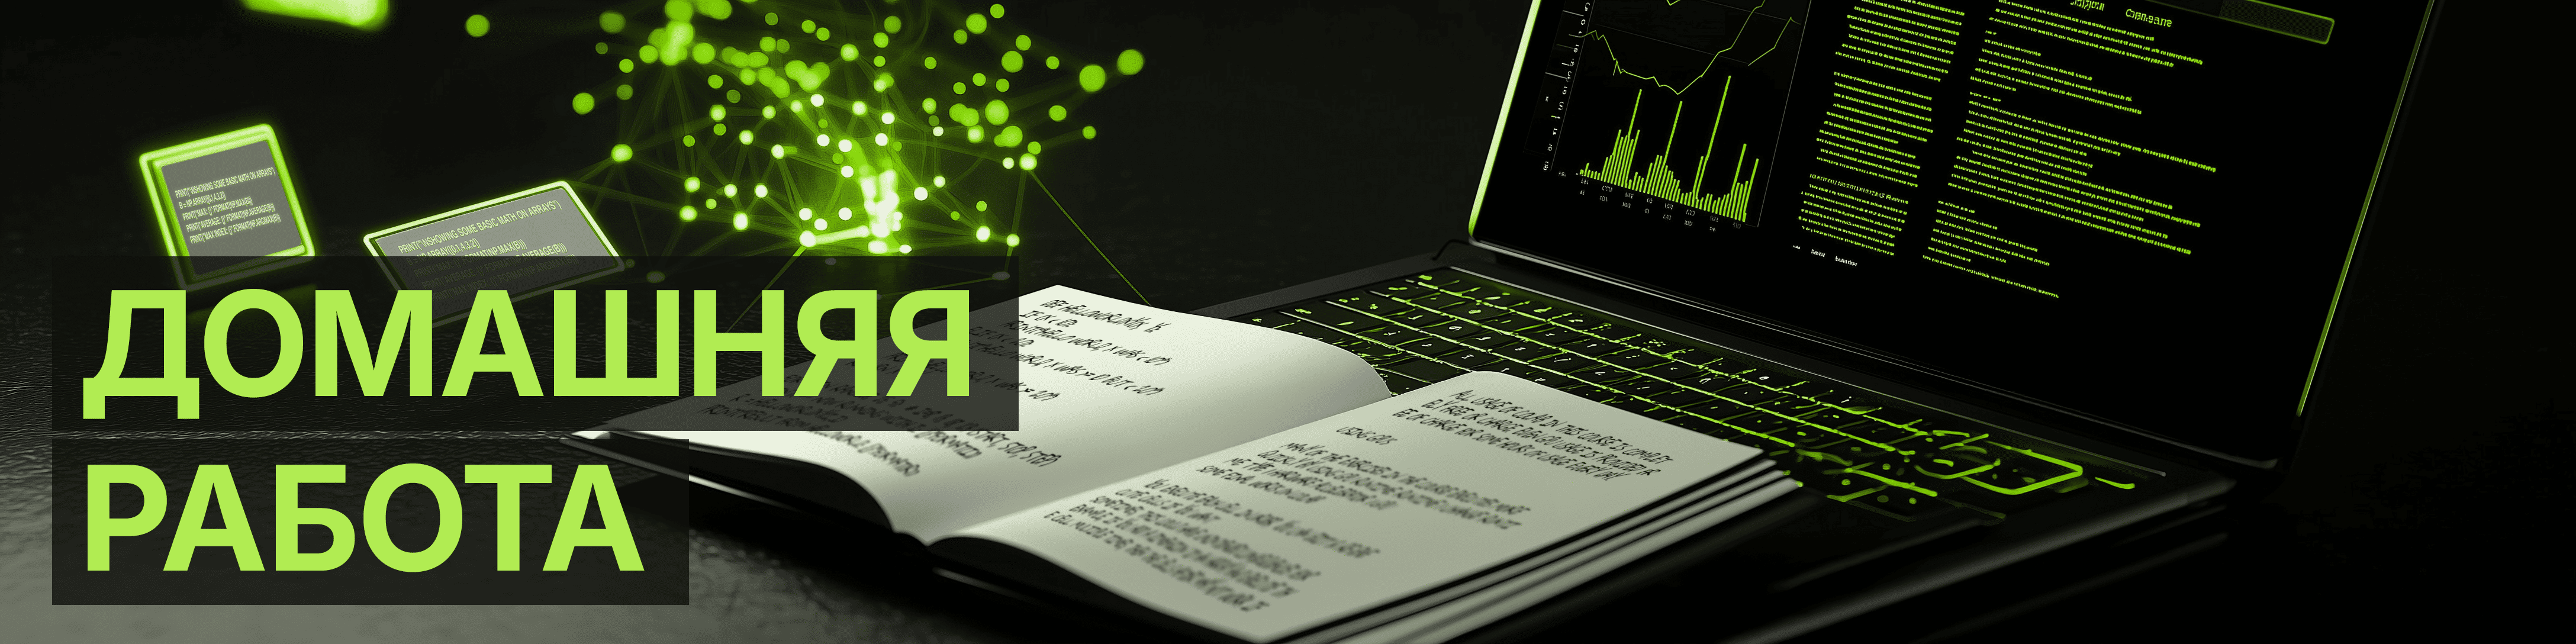

**Навигация по уроку**

1. [Обработка аудиосигналов](https://colab.research.google.com/drive/13r2TM72wK5mFSMsb1rBV4gspNCqkzJDY)
2. [Распознавание музыкального жанра](https://colab.research.google.com/drive/1VVV3EUT9uaVHNwZBweAsfOcDYwtPMJ2z)
3. [Генерация музыкальных произведений с помощью НС](https://colab.research.google.com/drive/1mxiZYMIVk_RhgNB_kXsySMkA-O2HkpHF)
4. Домашняя работа

**В домашней работе необходимо выполнить следующее задание:**

1. Используя предложенный [датасет](https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip) произведений классической музыки, обучи модель "сочинять" музыку на произведениях только одного Шопена.
2. В качестве начальной последовательности для генерации используйте произведения Моцарта.
3. Для получения трех баллов достаточно получить ноты и аудиофайл с вашим сгенерированным произведением.
4. Хотите 4 балла? Добавьте в функцию генерации параметр `temperature` - температура модели. Температура модели влияет на генерацию. Более низкие температуры соответствуют более точному предсказанию, а более высокие температуры приводят к более случайной генерации.
5. Хотите 5 баллов? Используйте для обучения модели три переменные для представления ноты: pitch, step и duration. Высота звука (pitch) - это качество восприятия звука в виде номера ноты в формате MIDI. Шаг (step) - это время, прошедшее с предыдущей ноты или начала трека. Длительность (duration) - это продолжительность воспроизведения ноты в секундах и разница между временем окончания и началом ноты.

# Необходимые библиотеки

In [ ]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
!add-apt-repository -y ppa:mscore-ubuntu/mscore3-stable
!apt-get update
!apt-get install musescore3
!pip install -U music21==9.1.0

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore3-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be upda

In [ ]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.14).
0 upgraded, 0 newly installed, 0 to remove and 141 not upgraded.


In [ ]:
from music21 import *

# настраиваем окружение в соответствии с документацией
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore3'
us['directoryScratch'] = '/tmp'

In [ ]:
# установим библиотеку для извлечения данных из MIDI
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.5 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592286 sha256=f5a8b35ce1164bcbd9256c8c0a5ccbdf01acf4a482e2a6df7f29e90bb6c59e45
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty_midi


In [ ]:
!pip install numpy  # Устанавливаем совместимую версию numpy
!pip install tensorflow  # Переустанавливаем tensorflow после этого

In [ ]:
# Импортируем библиотеки
import tensorflow
import os
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import fluidsynth
# импортируем загруженную библиотеку для работы с MIDI
import pretty_midi

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout
import keras.backend as K
from keras.optimizers import Adamax
from keras.utils import to_categorical

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

2025-05-18 11:50:52.846860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747569053.101263      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747569053.169430      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Загружаем датасет

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip

--2025-05-18 11:51:06--  https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2751606 (2.6M) [application/x-zip-compressed]
Saving to: ‘classical-music-midi.zip’

classical-music-mid 100%[===================>]   2.62M  6.58MB/s    in 0.4s    

2025-05-18 11:51:06 (6.58 MB/s) - ‘classical-music-midi.zip’ saved [2751606/2751606]



In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "classical-music-midi" -d ./dataset

In [ ]:
!dir ./dataset

Albeniz    Brahms	Debussy   Liszt        Rachmaninoff  Tchaikovsky
Bach	   Burgmueller	Godowsky  Mendelssohn  Ravel
Balakirev  Chopin	Granados  Moszkowski   Schubert
Beethoven  Christmas	Grieg	  Mozart       Schumann
Borodin    Clementi	Haydn	  Mussorgsky   Sinding


In [ ]:
# выбираем папку Шопена для обучения
filepath_Ch='./dataset/Chopin/'
# папка моцарта для генерации
filepath_M='./dataset/Mozart/'

#Составление датасета из отдельных файлов

Будем использовать библиотеку pretty_midi. Она предназначена для обработки midi файлов на более низком уровне, чем music21. В ней нет возможности напрямую обращаться к аккордам в файле, однако их можно отследить через начало нот: если начало нескольких нот совпадает по времени старта - то это один аккорд. Так же обрежем аккорды до 3 нот: базовой, терции и квинты, чтобы не перегружать нашу модель

In [ ]:
from collections import defaultdict

# функция обрезки аккорда
def trim_chord_essential(chord, max_notes=3):
    sorted_notes = sorted(chord)
    root = sorted_notes[0]
    essential = [root] # базовая нота

    # ищем терцию и квинту
    intervals = {3, 4, 7} # терции (3, 4) и квинта 7
    for note in sorted_notes[1:]:
        if (note - root) % 12 in intervals:
            essential.append(note)
            if len(essential) == max_notes:
                break

    # если не добрали нужное количество
    # добавляем ближайшие
    for note in sorted_notes:
        if note not in essential and len(essential) < max_notes:
            essential.append(note)

    return tuple(sorted(essential))

# функция обработки файла с таймингами
def process_midi_w_timing(filepath, max_notes=3):

    try:
        midi = pretty_midi.PrettyMIDI(filepath)
        events=[]   # сюда пойдут обработанные данные

        # собираем ноты
        all_notes = []
        for instrument in midi.instruments:
            all_notes.extend(instrument.notes)
        all_notes.sort(key=lambda x: x.start)

        # группируем по времени начала
        # получаем аккорды
        time_dict = defaultdict(list)
        for note in all_notes:
            time_dict[note.start].append(note.pitch)

        # обрабатываем аккорды
        prev_time = 0
        for i, start in enumerate(sorted(time_dict.keys())):
            pitches = time_dict[start]

            # обрезаем аккорд
            if len(pitches) > max_notes:
                pitches = trim_chord_essential(pitches, max_notes)
            else:
                pitches = tuple(sorted(pitches))

            # считаем длительность нот в аккорде
            chord_notes = [n for n in all_notes if n.start == start]
            duration = max(n.end - start for n in chord_notes)

            # считаем шаг для аккорда
            step = start - prev_time if i > 0 else start

            events.append({
                'file': os.path.basename(filepath),
                'pitches': pitches,
                'step': np.float16(step),
                'duration': np.float16(duration),
                'start_time': np.float16(start)
            })

            prev_time = start

        df = pd.DataFrame(events)
        df['note_count'] = df['pitches'].apply(len)
        return df

    except Exception as e:
        print(f'Ошибка обработки {filepath}: {e}')
        return pd.DataFrame()

# обработка папки с файлами

def process_midi_folder(folder_path):
    all_dfs=[]
    file_count=0

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.mid', '.midi')):
            filepath = os.path.join(folder_path, filename)
            df = process_midi_w_timing(filepath)

            if not df.empty:
                all_dfs.append(df)
                file_count += 1

    final_df = pd.concat(all_dfs, ignore_index=True)

    print(f'Файлов обработано: {file_count}')
    print(f'Всего событий: {len(final_df)}')

    return final_df

In [ ]:
Chopin_midi = process_midi_folder(filepath_Ch)

Файлов обработано: 48
Всего событий: 43476


In [ ]:
Chopin_midi

,file,pitches,step,duration,start_time,note_count
0,chpn_op7_2.mid,"(76,)",0.833496,0.430176,0.833496,1
1,chpn_op7_2.mid,"(77,)",0.430176,0.312500,1.263672,1
2,chpn_op7_2.mid,"(76,)",0.312500,0.104187,1.576172,1
3,chpn_op7_2.mid,"(57, 62, 65)",0.104187,0.421143,1.679688,3
4,chpn_op7_2.mid,"(57, 62, 65)",0.421143,0.496582,2.101562,3
...,...,...,...,...,...,...
43471,chpn_op66.mid,"(63,)",0.221802,1.822266,264.750000,1
43472,chpn_op66.mid,"(37,)",1.822266,3.875000,266.500000,1
43473,chpn_op66.mid,"(44,)",0.279541,3.595703,266.750000,1
43474,chpn_op66.mid,"(53,)",0.266357,3.330078,267.000000,1


In [ ]:
print(f"Одиночных нот {Chopin_midi[Chopin_midi['note_count']==1].shape[0]}")
print(f"Аккордов с 2 нотами {Chopin_midi[Chopin_midi['note_count']==2].shape[0]}")
print(f"Аккордов с 3 нотами {Chopin_midi[Chopin_midi['note_count']==3].shape[0]}")

Одиночных нот 21751
Аккордов с 2 нотами 12125
Аккордов с 3 нотами 9600


In [ ]:
print(f"Различных нот/аккордов {Chopin_midi['pitches'].nunique()}")

Различных нот/аккордов 3692


In [ ]:
all_notes_series = Chopin_midi['pitches'].explode()

# Найти минимум и максимум
min_note = all_notes_series.min()
max_note = all_notes_series.max()

print(f"Минимальная нота: {min_note}")
print(f"Максимальная нота: {max_note}")

Минимальная нота: 24
Максимальная нота: 101


In [ ]:
def midi_to_note_and_octave(midi_numbers):
    notes = []
    octaves = []
    for midi in midi_numbers:
        note = pretty_midi.note_number_to_name(midi)
        for i, char in enumerate(note):
            if char.isdigit():
                note_name = note[:i]  # Название ноты
                octave_number = int(note[i:])  # Номер октавы


        notes.append(note_name)
        octaves.append(octave_number)
    return notes, octaves

def midi_to_note_full(midi_numbers):
    notes = []
    for midi in midi_numbers:
        note = pretty_midi.note_number_to_name(midi)

        notes.append(note)

    return notes

In [ ]:
# Создание новых колонок для частот и октав
Chopin_midi['notes'] = Chopin_midi['pitches'].apply(lambda x: midi_to_note_and_octave(x)[0]).apply(tuple)
Chopin_midi['octaves'] = Chopin_midi['pitches'].apply(lambda x: midi_to_note_and_octave(x)[1]).apply(tuple)
Chopin_midi['notes_full'] = Chopin_midi['pitches'].apply(lambda x: midi_to_note_full(x)).apply(tuple)

In [ ]:
Chopin_midi

,file,pitches,step,duration,start_time,note_count,notes,octaves,notes_full
0,chpn_op7_2.mid,"(76,)",0.833496,0.430176,0.833496,1,"(E,)","(5,)","(E5,)"
1,chpn_op7_2.mid,"(77,)",0.430176,0.312500,1.263672,1,"(F,)","(5,)","(F5,)"
2,chpn_op7_2.mid,"(76,)",0.312500,0.104187,1.576172,1,"(E,)","(5,)","(E5,)"
3,chpn_op7_2.mid,"(57, 62, 65)",0.104187,0.421143,1.679688,3,"(A, D, F)","(3, 4, 4)","(A3, D4, F4)"
4,chpn_op7_2.mid,"(57, 62, 65)",0.421143,0.496582,2.101562,3,"(A, D, F)","(3, 4, 4)","(A3, D4, F4)"
...,...,...,...,...,...,...,...,...,...
43471,chpn_op66.mid,"(63,)",0.221802,1.822266,264.750000,1,"(D#,)","(4,)","(D#4,)"
43472,chpn_op66.mid,"(37,)",1.822266,3.875000,266.500000,1,"(C#,)","(2,)","(C#2,)"
43473,chpn_op66.mid,"(44,)",0.279541,3.595703,266.750000,1,"(G#,)","(2,)","(G#2,)"
43474,chpn_op66.mid,"(53,)",0.266357,3.330078,267.000000,1,"(F,)","(3,)","(F3,)"


## Проверка подсчетов

In [ ]:
Chopin_midi.notes.nunique()

1063

In [ ]:
chords = set(Chopin_midi.notes)
normalized_chords = [tuple(sorted(chord)) for chord in chords]
unique_chords = set(normalized_chords)
count_unique = len(unique_chords)
count_unique

406

Сначала подумал, что где то ошибка, т.к. комбинаций аккордов до 3 нот из уникальных нот всего 298, а в сете 1063. за тем нашел ошибку, что порядок нот в аккордах отличался и эти аккорды считались несколько раз, хотя являются одним аккордом (без учета октав). Получил 406 после поправки расчетов, все равно больше 298. Но я не учел гениальность композиторов, которые составляют аккорды и не из уникальных нот, но из разных октав. Обнаружил, например, аккорды типа (G#2, G#3, G#4), а в таком случае всего можно составить 454 аккорда, что уже попадает в необходимый диапазон.

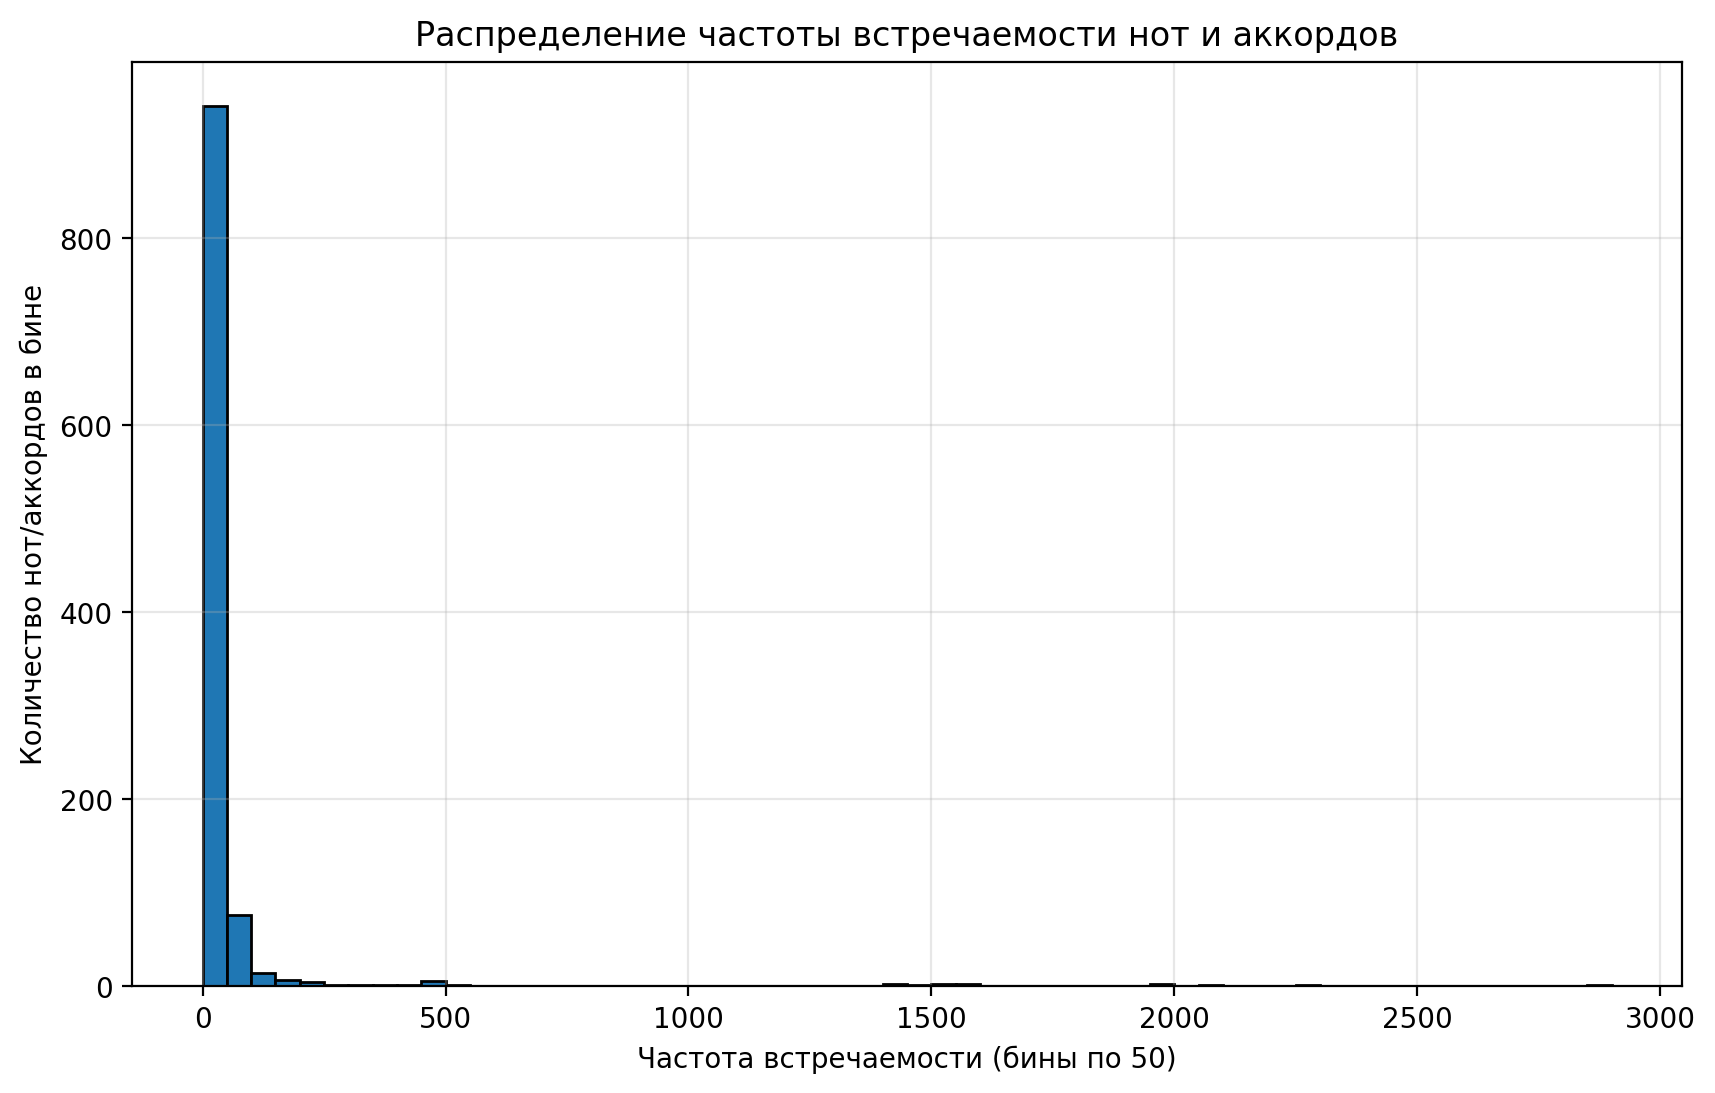

In [ ]:
# Подсчет частоты встречаемости каждого уникального аккорда/ноты
frequency = Chopin_midi['notes'].value_counts()

# Создание бинов с шагом 50
bins = np.arange(0, frequency.max() + 50, 50)
hist, edges = np.histogram(frequency, bins=bins)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(edges[:-1], hist, width=50, align='edge', edgecolor='black')
plt.xlabel('Частота встречаемости (бины по 50)')
plt.ylabel('Количество нот/аккордов в бине')
plt.title('Распределение частоты встречаемости нот и аккордов')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
for i in range(3):
    print(f"Бин {edges[i]} - {edges[i+1]-1}: {hist[i]} нот/аккордов")

Бин 0 - 49: 941 нот/аккордов
Бин 50 - 99: 76 нот/аккордов
Бин 100 - 149: 14 нот/аккордов


Получается, что если убрать редко встречающиеся комбинации, то останется 122 комбинации нот.

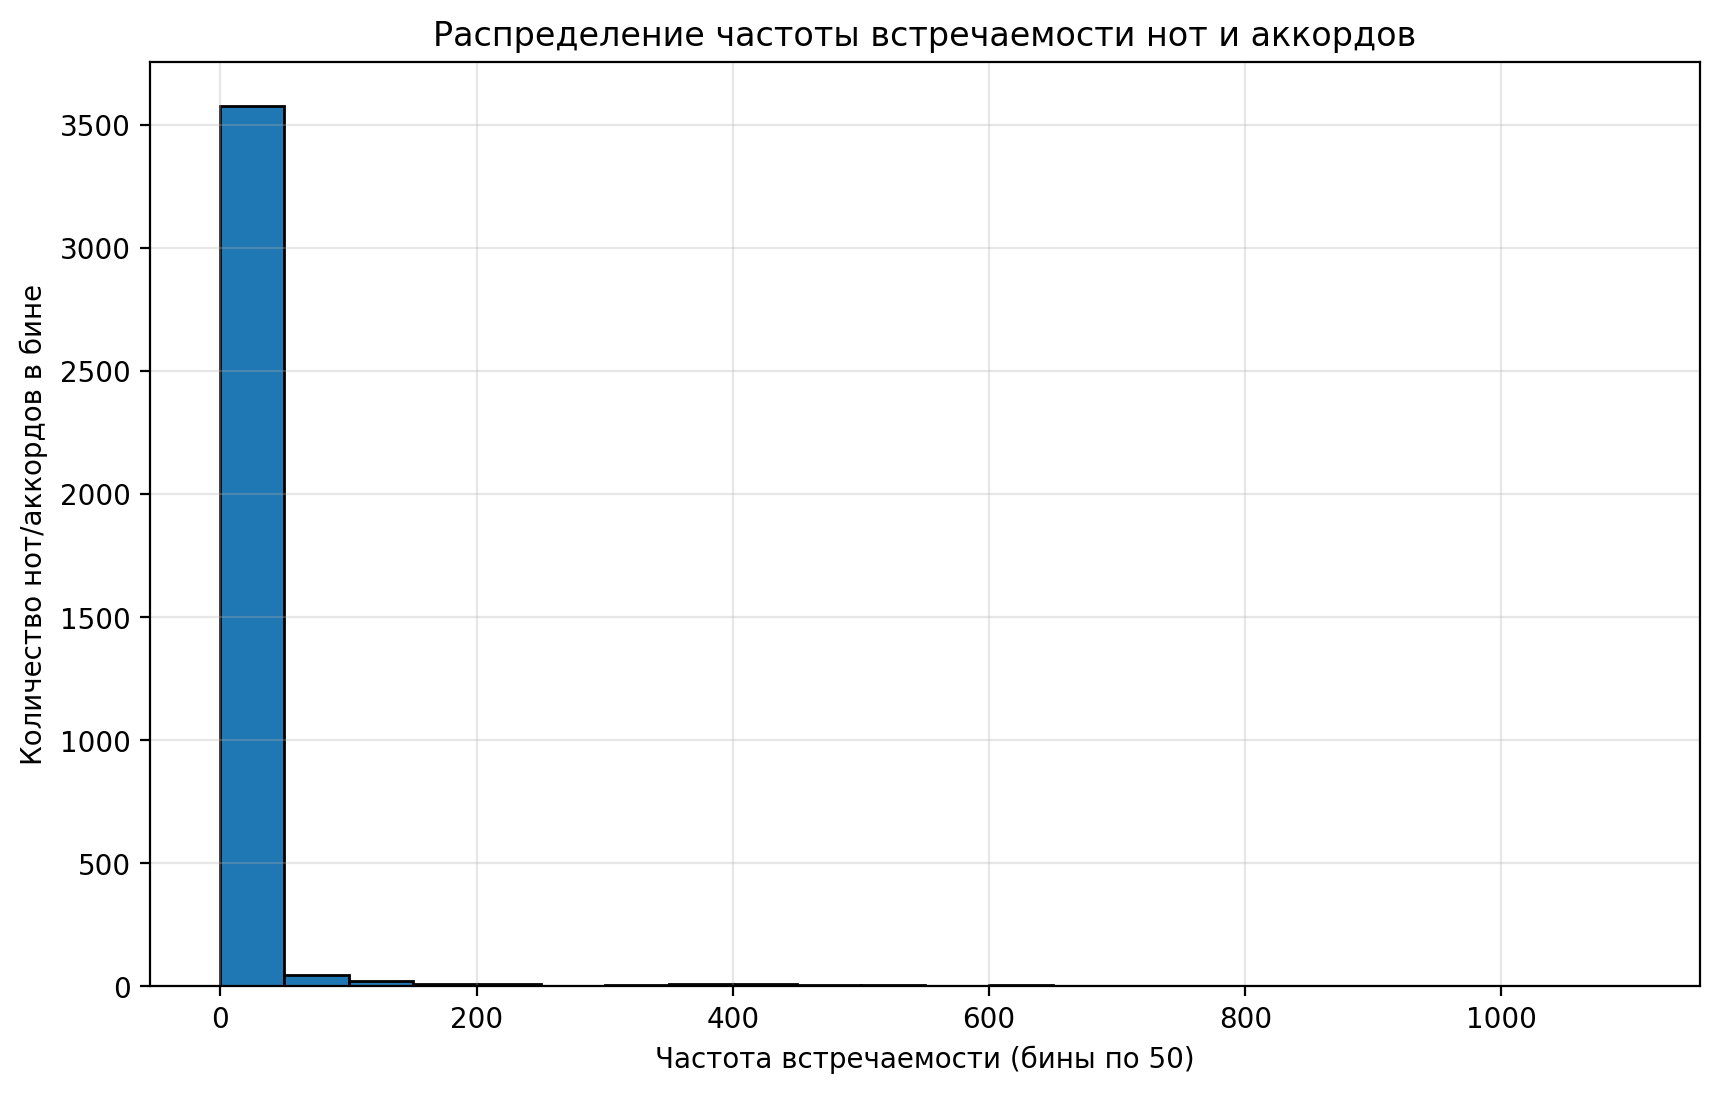

In [ ]:
# Подсчет частоты встречаемости каждого уникального аккорда/ноты
frequency = Chopin_midi['pitches'].value_counts()

# Создание бинов с шагом 50
bins = np.arange(0, frequency.max() + 50, 50)
hist, edges = np.histogram(frequency, bins=bins)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(edges[:-1], hist, width=50, align='edge', edgecolor='black')
plt.xlabel('Частота встречаемости (бины по 50)')
plt.ylabel('Количество нот/аккордов в бине')
plt.title('Распределение частоты встречаемости нот и аккордов')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
for i in range(3):
    print(f"Бин {edges[i]} - {edges[i+1]-1}: {hist[i]} нот/аккордов")

Бин 0 - 49: 3576 нот/аккордов
Бин 50 - 99: 44 нот/аккордов
Бин 100 - 149: 19 нот/аккордов


Если мы убираем редкие комбинации из данной колонки, то остается 118 вариантов. Но здесь в каждую комбинацию уже добавлена информация об октавах нот, что сильно облегчит задачу подготовки данных для обучения модели.

Как итог составления сета: в дальнейшей обработке буду использовать колонки pitch (т.к. она уже оцифрована), step, duration.

## Удаляем редкие аккорды

In [ ]:
count_num = Counter(Chopin_midi['pitches'])
print("Общее число уникальных нот:", len(count_num))

Общее число уникальных нот: 3692


In [ ]:
# Ключ в словаре - имена нот
# Значение в словаре - их количество

Notes = list(count_num.keys())
Recurrence = list(count_num.values())

# Средняя частота встречаемости нот в корпусе
def Average(rec):
    return sum(rec) / len(rec)

print('Средняя повторяемость ноты:', Average(Recurrence))
print('Наиболее часто встречаемые ноты:', max(Recurrence), 'раз')
print('Наиболее редкие ноты:', min(Recurrence), 'раз')

Средняя повторяемость ноты: 11.775731310942579
Наиболее часто встречаемые ноты: 1068 раз
Наиболее редкие ноты: 1 раз


In [ ]:
# Получение списка редких нот
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 50:
        m =  key
        rare_note.append(m)

print("Общее число нот, которые повторяются менее 50 раз:", len(rare_note))

Общее число нот, которые повторяются менее 50 раз: 3576


In [ ]:
total = 0
for index, (key, value) in enumerate(count_num.items()):
    if value < 50:
        total += value

print(f'Общее количество редких событий <50 в сете: {total}')

Общее количество редких событий <50 в сете: 17438


In [ ]:
Chopin_midi = Chopin_midi[~Chopin_midi['pitches'].isin(rare_note)]

print("Длина корпуса после исключения редких нот:", len(Chopin_midi))

Длина корпуса после исключения редких нот: 26038


Почти половина, надеюсь, не сильно скажется на обучении.

In [ ]:
max_step = Chopin_midi['step'].max()
max_duration = Chopin_midi['duration'].max()

print(f"Максимальный step: {max_step}")
print(f"Максимальная duration: {max_duration}")

Максимальный step: 5.30859375
Максимальная duration: 8.75


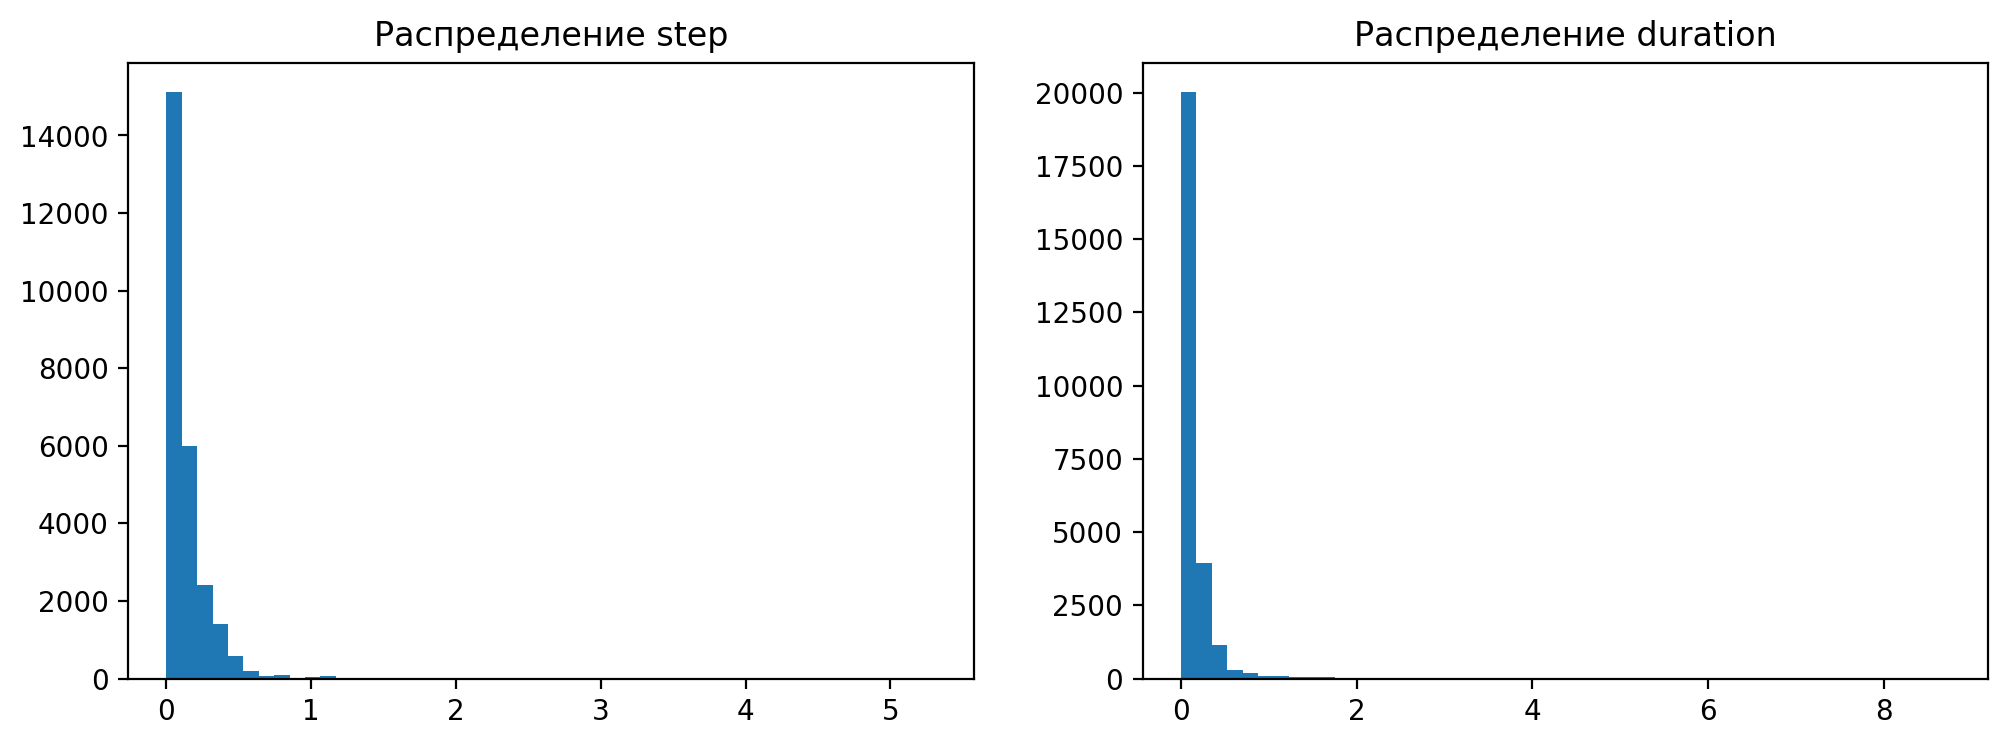

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(Chopin_midi['step'], bins=50)
plt.title("Распределение step")

plt.subplot(1, 2, 2)
plt.hist(Chopin_midi['duration'], bins=50)
plt.title("Распределение duration")
plt.show()

В данных присутствуют выбросы в значительно больший диапазон. Необходимо сгладить их влияние, оставив при этом в сете, т.к. это часть музыкального стиля. Попробую логарифмировать данные, а за тем отмасштабировать.

In [ ]:
Chopin_midi['step_log'] = np.log1p(Chopin_midi['step'])
Chopin_midi['step_norm'] = Chopin_midi['step_log'] / np.max(Chopin_midi['step_log'])

Chopin_midi['duration_log'] = np.log1p(Chopin_midi['duration'])
Chopin_midi['duration_norm'] = Chopin_midi['duration_log'] / np.max(Chopin_midi['duration_log'])


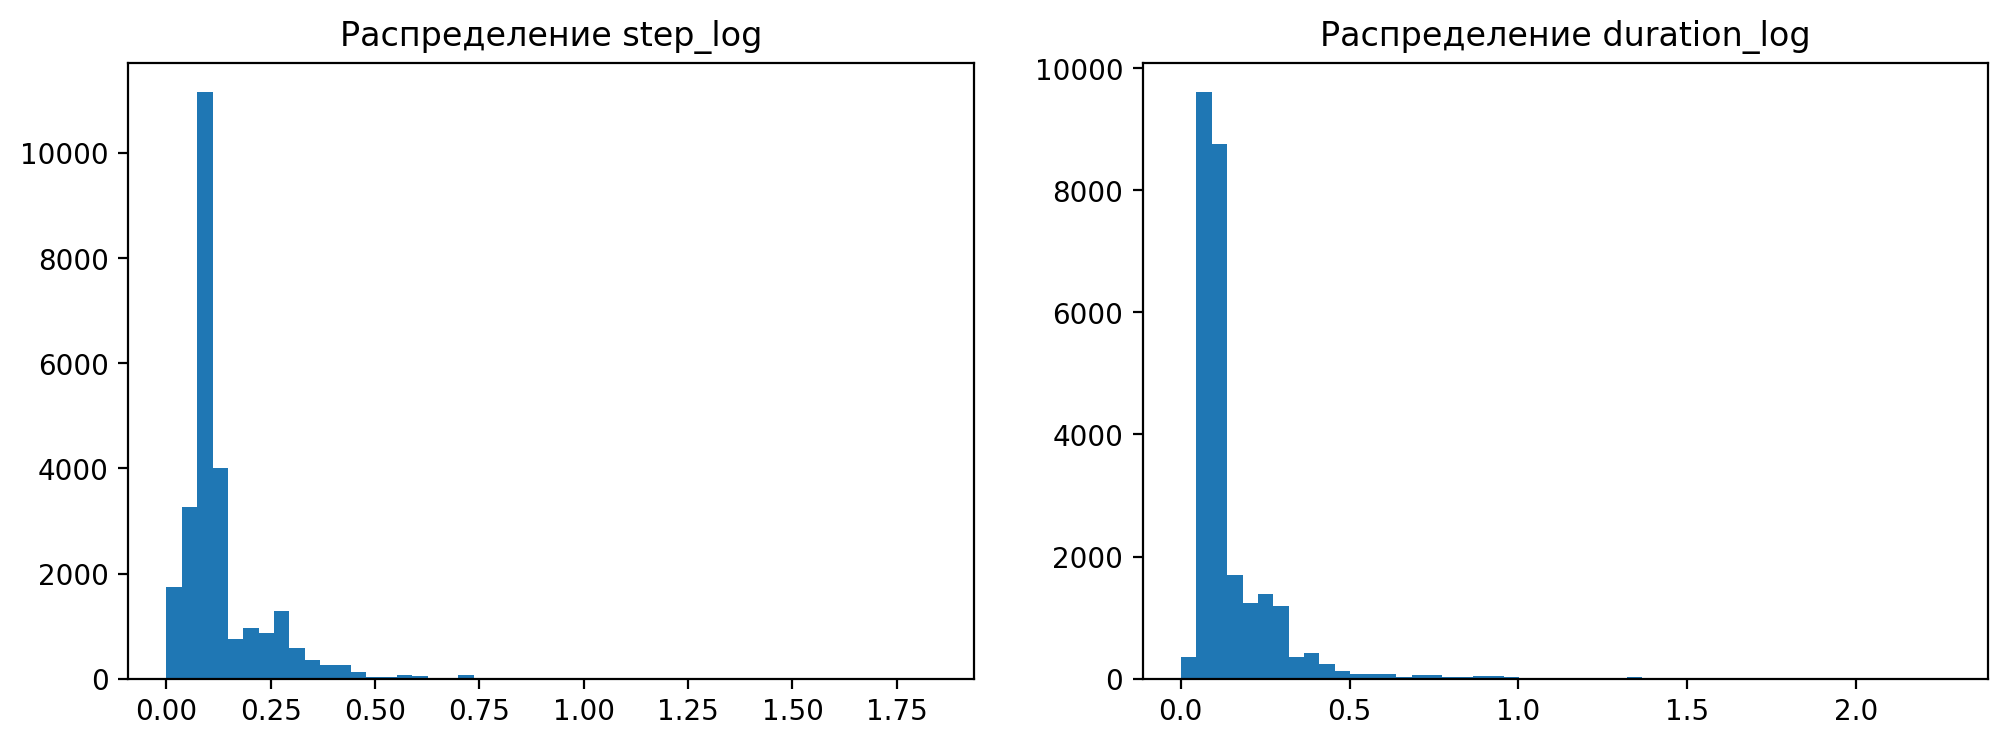

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(Chopin_midi['step_log'], bins=50)
plt.title("Распределение step_log")

plt.subplot(1, 2, 2)
plt.hist(Chopin_midi['duration_log'], bins=50)
plt.title("Распределение duration_log")
plt.show()

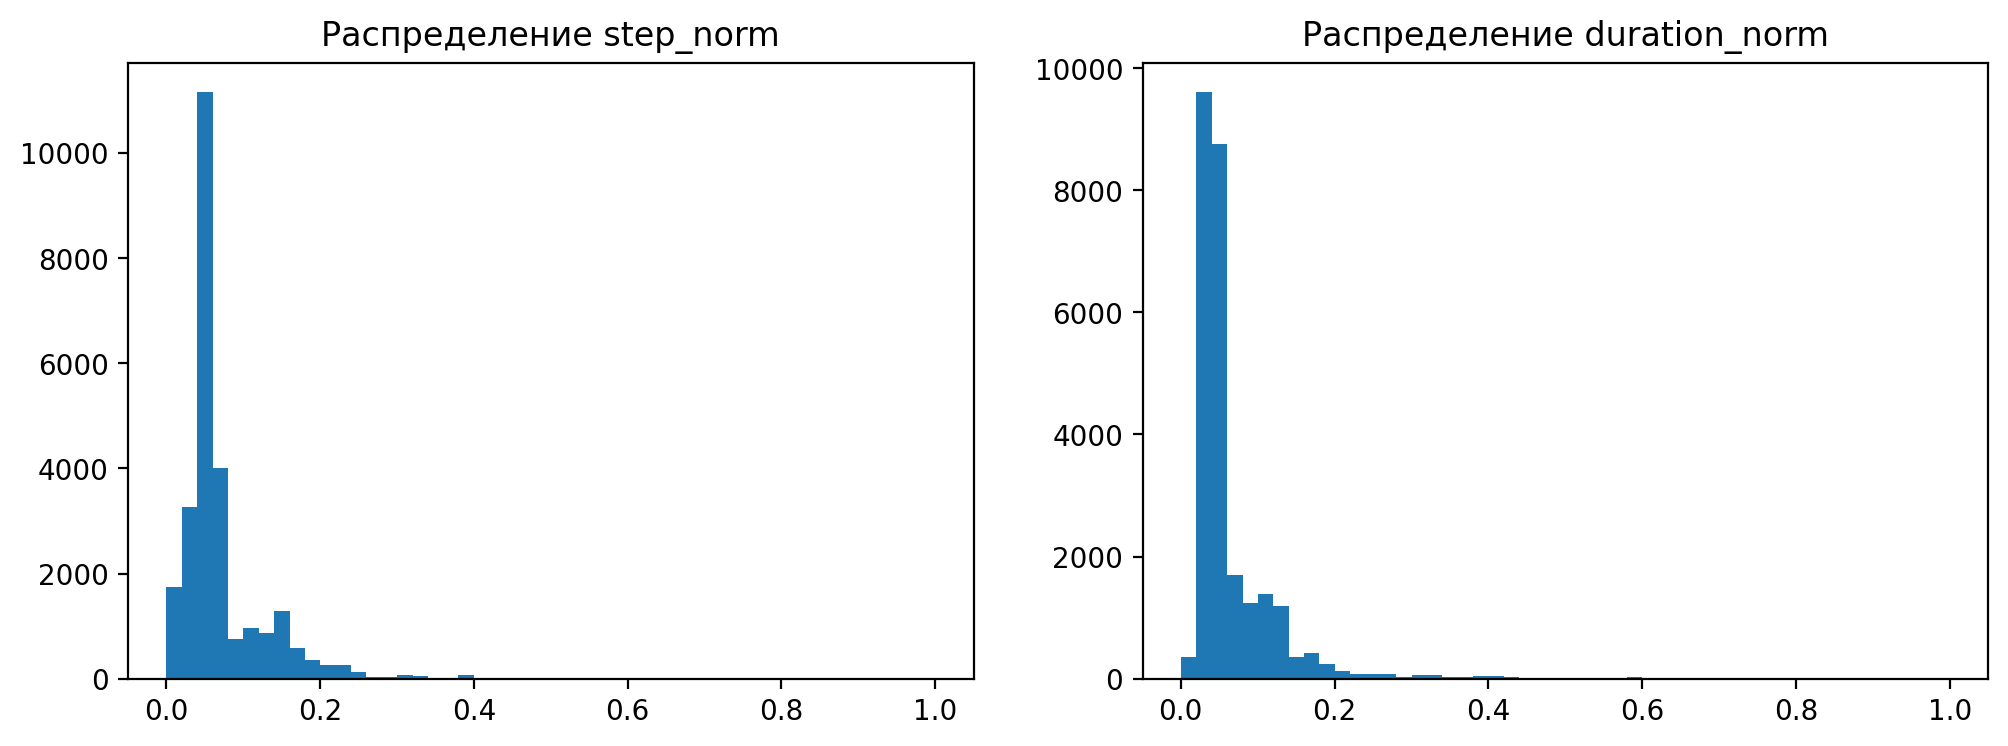

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(Chopin_midi['step_norm'], bins=50)
plt.title("Распределение step_norm")

plt.subplot(1, 2, 2)
plt.hist(Chopin_midi['duration_norm'], bins=50)
plt.title("Распределение duration_norm")
plt.show()

In [ ]:
step_max_log = np.max(Chopin_midi['step_log'])
duration_max_log = np.max(Chopin_midi['duration_log'])

max_log_dict = {'step': step_max_log, 'duration': duration_max_log}

print(f'max step log: {max_log_dict["step"]}')
print(f'max duration log: {max_log_dict["duration"]}')

max step log: 1.841796875
max duration log: 2.27734375


In [ ]:
#для восстановления оригинальных значений из предсказания
def restore_value(predict, value_name, max_log_dict=max_log_dict):
    max_log = max_log_dict[f'{value_name}']
    log_restored = predict * max_log
    original = np.expm1(log_restored)

    return original

In [ ]:
scaler = RobustScaler()

Chopin_midi['step_log_robust'] = scaler.fit_transform(Chopin_midi[['step_log']])
Chopin_midi['duration_log_robust'] = scaler.fit_transform(Chopin_midi[['duration_log']])

Chopin_midi['step_robust'] = scaler.fit_transform(Chopin_midi[['step']])
Chopin_midi['duration_robust'] = scaler.fit_transform(Chopin_midi[['duration']])

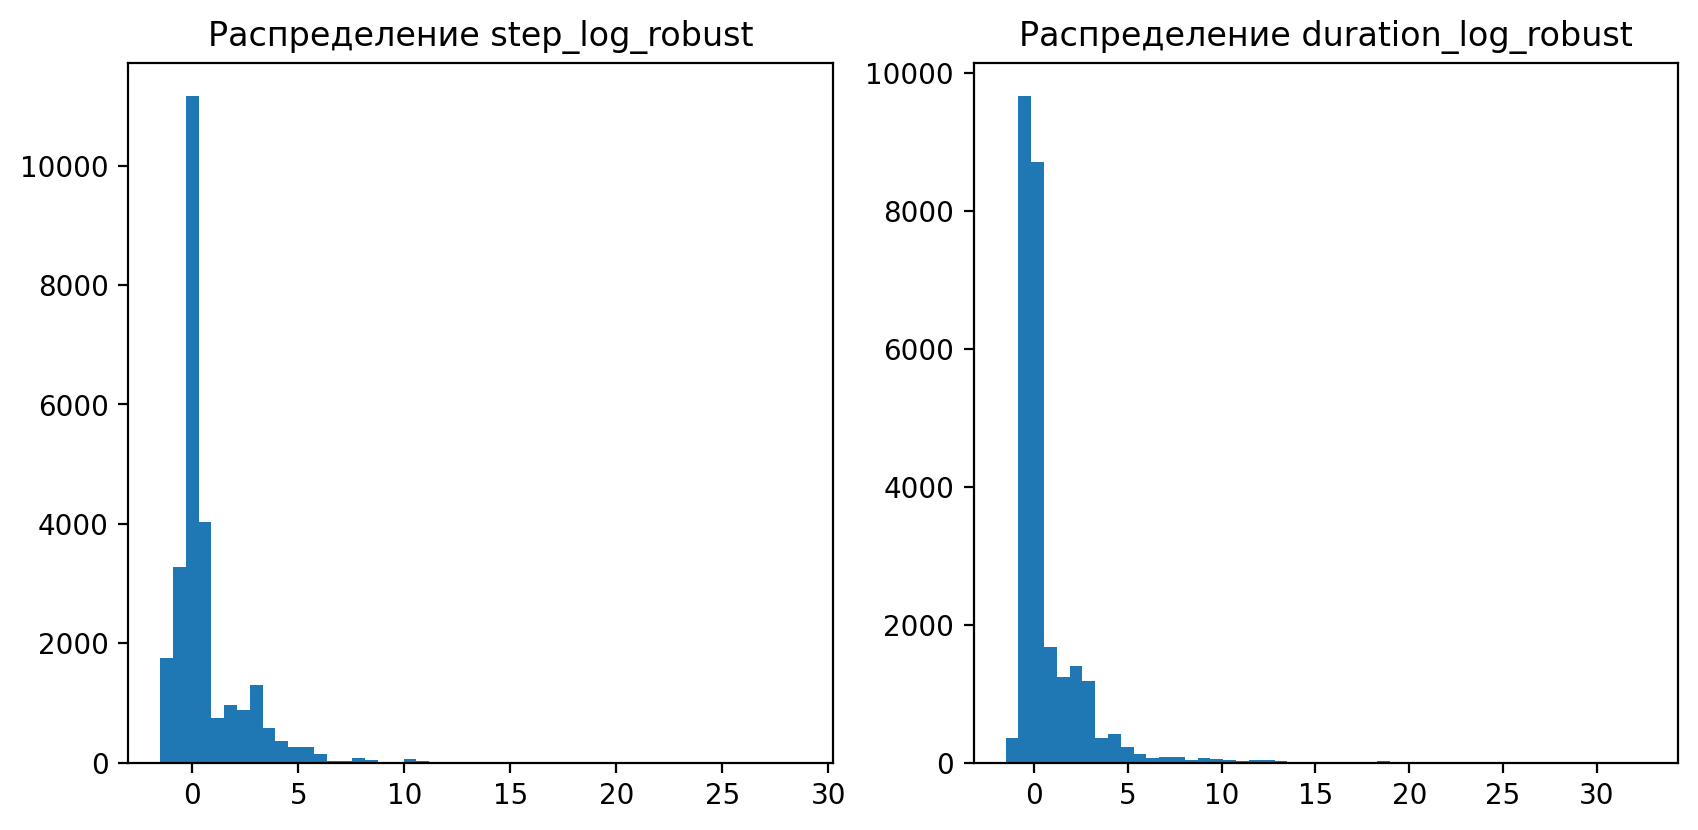

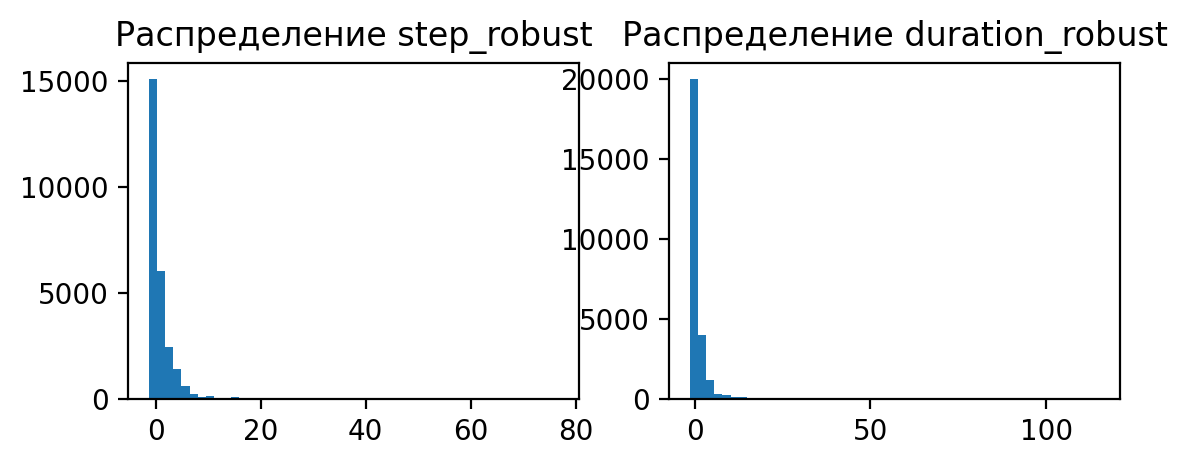

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(Chopin_midi['step_log_robust'], bins=50)
plt.title("Распределение step_log_robust")

plt.subplot(2, 2, 2)
plt.hist(Chopin_midi['duration_log_robust'], bins=50)
plt.title("Распределение duration_log_robust")
plt.show()

plt.subplot(2, 2, 3)
plt.hist(Chopin_midi['step_robust'], bins=50)
plt.title("Распределение step_robust")

plt.subplot(2, 2, 4)
plt.hist(Chopin_midi['duration_robust'], bins=50)
plt.title("Распределение duration_robust")

plt.show()

После проверок вариантов нормализации попробую остановиться на простой обрезке до значения 1 в колонках шаг и длительность, т.к. основная масса не нормализованных значений находится в этом диапазоне.

In [ ]:
Chopin_midi['step_clip'] = np.clip(Chopin_midi['step'], None, 1.0)
Chopin_midi['duration_clip'] = np.clip(Chopin_midi['duration'], None, 1.0)

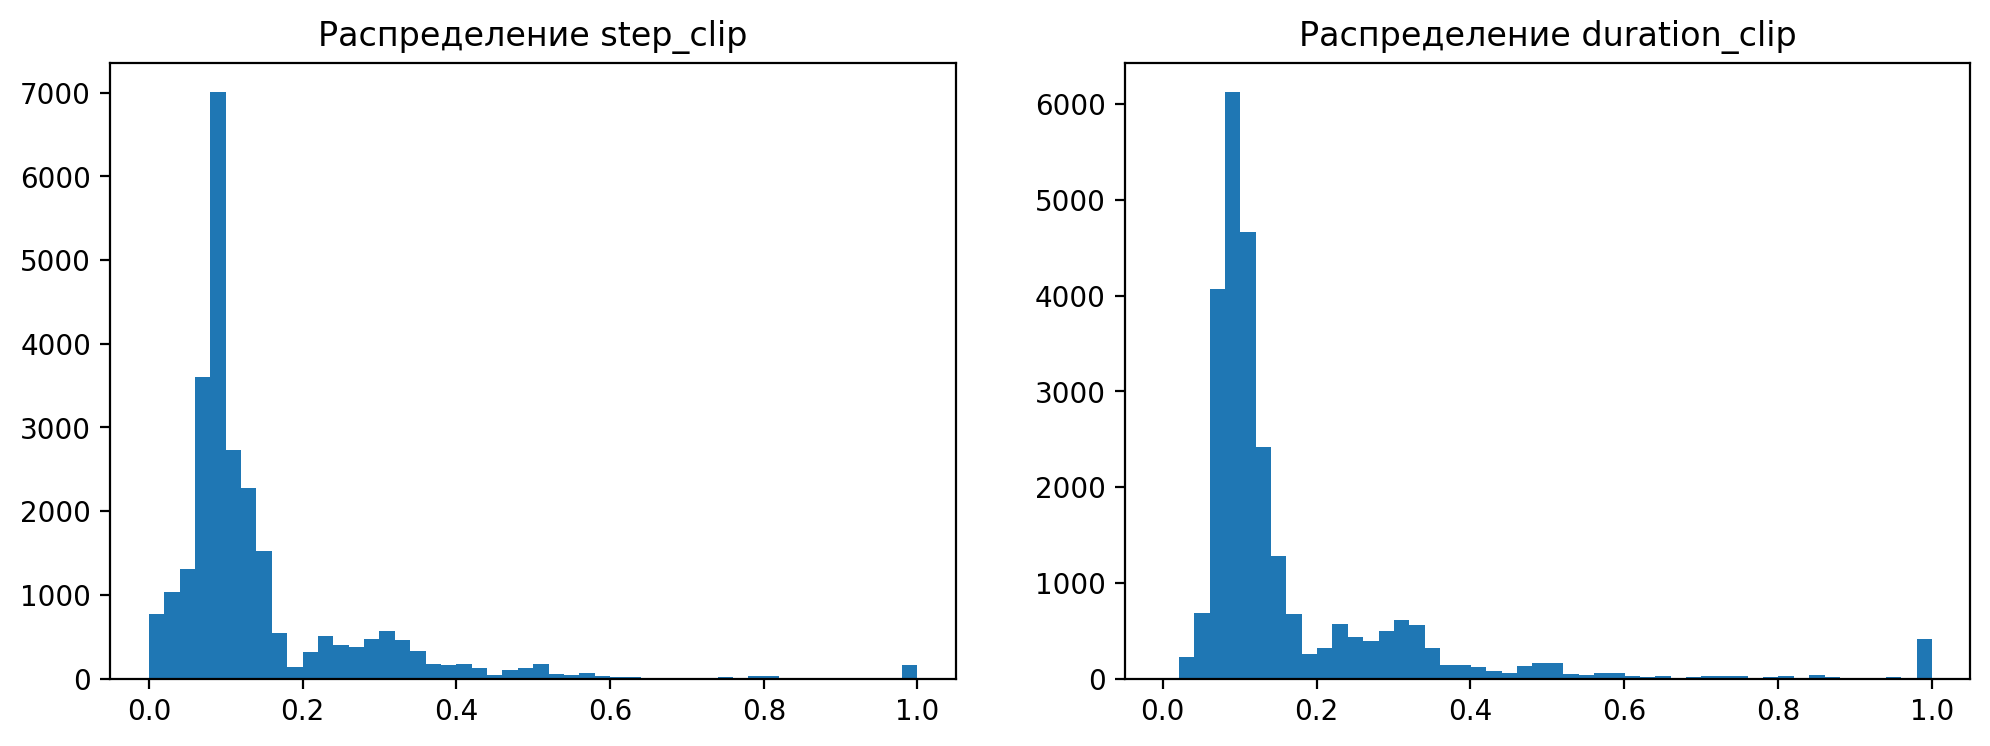

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(Chopin_midi['step_clip'], bins=50)
plt.title("Распределение step_clip")

plt.subplot(1, 2, 2)
plt.hist(Chopin_midi['duration_clip'], bins=50)
plt.title("Распределение duration_clip")
plt.show()

Все еще не тот результат, с которым бы хотелось работать. Попробую нелинейную нормализацию: значения до 0.6 остаются как есть, а знаечния выше скалируются в диапазон 0.6-1

In [ ]:
def custom_norm(data, max_value=None, threshold=0.6):
    """
    оставляет диапазон 0 - 0.6
    скалирует 0.6-max -> 0.6-0.999

    Важно!
    обязательно не ровно 1 т.к. в модели используется активация sigmoid
    которая не достигает строго 1

    data: колонка
    threshold: граница
    max_value: максимум, если не указан - берется из данных
    """
    if max_value is None:
        max_value = np.max(data)

    # нормализация значений > threshold
    scale = (0.999 - threshold) / (max_value - threshold)

    normalized = np.where(
        data <= threshold,
        data,               # не трогаем <= threshold
        threshold + scale * (data-threshold)    # масштабируем > 0.6
    )
    return normalized


def custom_descale(normalized, max_value=None, threshold=0.6):
    #обратная функция
    if max_value is None:
        raise ValueError("Укажите max_value для обратного преобразования")

    scale = (max_value - threshold) / (0.999 - threshold)

    original = np.where(
        normalized <= threshold,
        normalized,
        threshold + (normalized - threshold) * scale
    )

    return original

In [ ]:
Chopin_midi['step_custom'] = custom_norm(Chopin_midi['step'])
Chopin_midi['duration_custom'] = custom_norm(Chopin_midi['duration'])

In [ ]:
print(np.max(Chopin_midi.step_custom))
print(np.max(Chopin_midi.duration_custom))

0.999
0.999


In [ ]:
step_max_value = np.max(Chopin_midi['step'])
duration_max_value = np.max(Chopin_midi['duration'])
print(step_max_value)
print(duration_max_value)

5.31
8.75


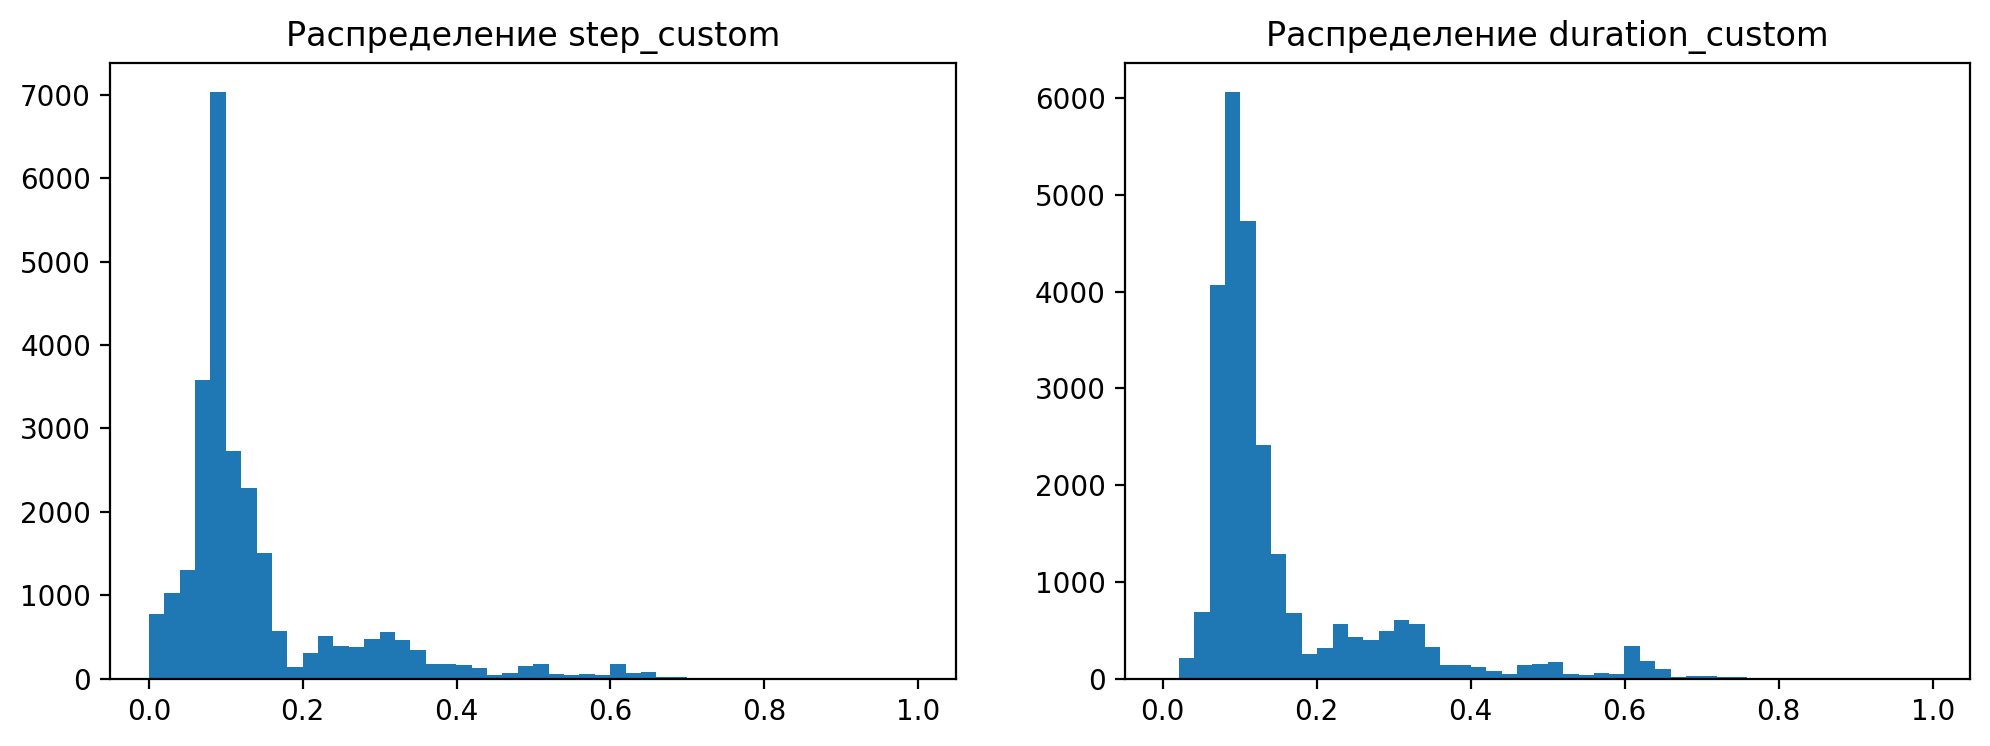

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(Chopin_midi['step_custom'], bins=50)
plt.title("Распределение step_custom")

plt.subplot(1, 2, 2)
plt.hist(Chopin_midi['duration_custom'], bins=50)
plt.title("Распределение duration_custom")
plt.show()

In [ ]:
np.max(Chopin_midi.step_custom)

0.999

Что ж, попробуем с такой нормализацией

In [ ]:
# проверка обратного преобразования
test_descale = custom_descale(Chopin_midi['step_custom'], max_value=np.max(Chopin_midi['step']))

Text(0.5, 1.0, 'Распределение step')

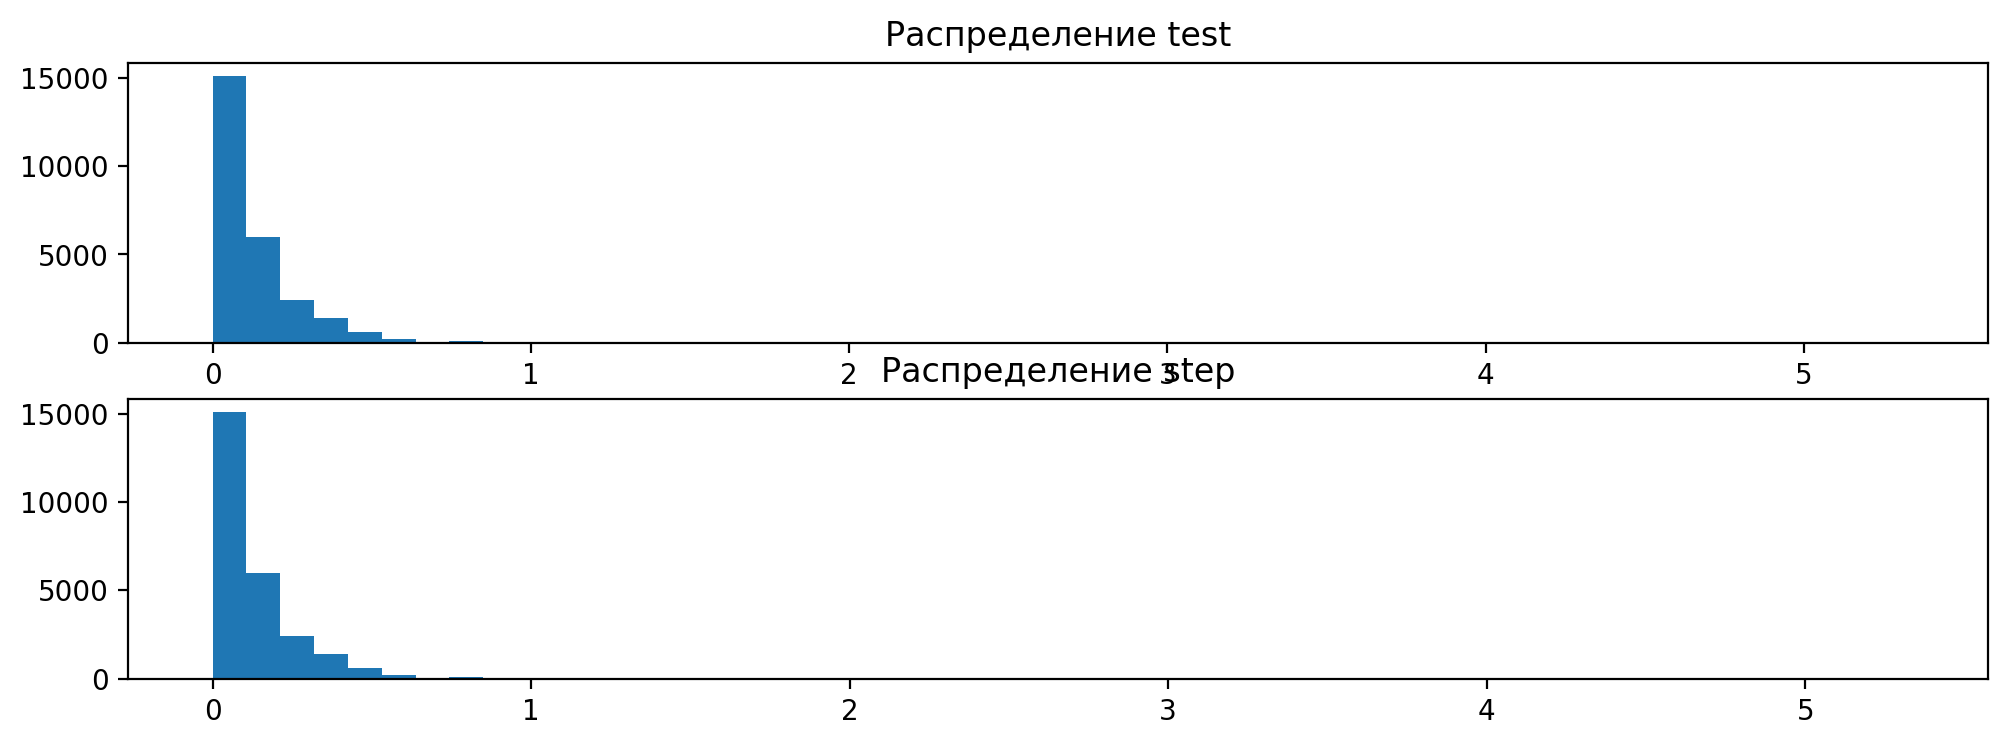

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.hist(test_descale, bins=50)
plt.title("Распределение test")

plt.subplot(2, 1, 2)
plt.hist(Chopin_midi['step'], bins=50)
plt.title("Распределение step")

Обратная функция работает корректно

## Создание словаря

In [ ]:
# Сохраняем все уникальные значения корпуса
symb = sorted(list(set(Chopin_midi.pitches)))

L_corpus = len(Chopin_midi) # длина корпуса
L_symb = len(symb) # число уникальных элементов корпуса

# Создание словаря для доступа к словарному запасу из индексов и наоборот
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Общее число символов:", L_corpus)
print("Число уникальных символов:", L_symb)

Общее число символов: 26038
Число уникальных символов: 116


# Создание последовательностей

## Подготовка обучающих последовательностей

Так как начало и окончание произведения скорее всего не сочетаются в музыкальном плане, то создавать последовательности буду по произведениям, когда дойду до конца произведения - окно переместится целиком на начало нового.

Так же сразу добавлю нормализацию нот и кодирование целефых нот в ohe.

Traget разделю на ноты, шаг и длительность, т.к. для них будут свои ветки обработки

In [ ]:
def prepare_seq(dataset, length=32, step=1, mapping=None, return_full=True):
    """
    Подготавливает последовательности для обучения модели.

    Параметры:
    - dataset: DataFrame с колонками ['file', 'pitches', 'step_custom', 'duration_custom']
    - length: длина входной последовательности
    - step: шаг при создании последовательностей
    - mapping: словарь для кодирования pitch в числовой формат
    - return_full: если True, возвращает полный набор
    (train_features, target_ohe, target_step, target_duration)
    - return_full: если False, возвращает (train_features)

    Возвращает:
    - train_features: массив входных последовательностей формы (n_sequences, length, 3)
    - target_ohe: one-hot encoded целевые pitch
    - target_step: массив шагов
    - target_duration: массив длительностей
    """
    required_columns = ['file', 'pitches', 'step_custom', 'duration_custom']
    if not all(col in dataset.columns for col in required_columns):
        raise ValueError(f"Датасет должен содержать колонки: {required_columns}")

    if mapping is None:
        raise ValueError("Необходимо передать словарь mapping для кодирования pitch")

    L_symb = len(mapping)

    train_features = []
    target_ohe = []
    target_step = []
    target_duration = []

    for _, group in dataset.groupby('file'):
        midi_file = group[['pitches', 'step_custom', 'duration_custom']].values
        file_length = len(midi_file)

        for i in range(0, file_length - length, step):
            seq_features = []
            valid_seq_length = 0

            while valid_seq_length < length and i + valid_seq_length < file_length:
                pitch = midi_file[i + valid_seq_length][0]

                if pitch in mapping:
                    seq_features.append([
                        mapping[pitch] / L_symb,  # нормализованный pitch
                        midi_file[i + valid_seq_length][1],  # step
                        midi_file[i + valid_seq_length][2]   # duration
                    ])
                    valid_seq_length += 1
                else:
                    # Если pitch не найден, просто увеличиваем индекс
                    i += 1

            if valid_seq_length == length:
                train_features.append(np.array(seq_features))  # Преобразуем в массив NumPy

                if return_full:
                    target_note = midi_file[i + valid_seq_length]
                    target_encoded = mapping.get(target_note[0], None)

                    if target_encoded is not None:
                        target_ohe.append(to_categorical(target_encoded, L_symb))
                        target_step.append([target_note[1]])
                        target_duration.append([target_note[2]])

    # Преобразуем в массив с нужной формой
    train_features = np.array(train_features)  # (n_sequences, length, 3)

    if return_full:
        target_ohe = np.array(target_ohe)
        target_step = np.array(target_step)
        target_duration = np.array(target_duration)

        L_datapoints = len(target_ohe)

        print(f"Общее количество последовательностей: {L_datapoints}")
        print(f"Пример\n features[0][0]: {train_features[0][0]}")
        print(f"target_ohe: {target_ohe[0]}")
        print(f"target_step: {target_step[0]}")
        print(f"target_duration: {target_duration[0]}\n")

        print("Форма train_features:", train_features.shape)
        print("Форма target_ohe:", target_ohe.shape)
        print("Форма target_step:", target_step.shape)
        print("Форма target_duration:", target_duration.shape)

        return train_features, target_ohe, target_step, target_duration
    else:
        print(f"Пример набора pitch, step, duration: {train_features[0][0]}")
        print("Форма:", train_features.shape)
        return train_features


In [ ]:
train_features, target_ohe, target_step, target_duration = prepare_seq(Chopin_midi, mapping=mapping)

Общее количество последовательностей: 24569
Пример
 features[0][0]: [0.75       0.         0.57666016]
target_ohe: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
target_step: [0.1373291]
target_duration: [0.14904785]

Форма train_features: (24569, 32, 3)
Форма target_ohe: (24569, 116)
Форма target_step: (24569, 1)
Форма target_duration: (24569, 1)


In [ ]:
print("Step min/max:", np.min(target_step), np.max(target_step))
print("Duration min/max:", np.min(target_duration), np.max(target_duration))

Step min/max: 0.0005865097045898438 0.8515625
Duration min/max: 0.0009722709655761719 0.9990234375


Последовательность для обучения готова, осталось создать последовательность для сидов из файлов Моцарта.

## Подготовка сидов

### Обработка датасета Моцарта

In [ ]:
Mozart_midi = process_midi_folder(filepath_M)

count_num = Counter(Mozart_midi['pitches'])
print("Общее число уникальных нот:", len(count_num))
# Получение списка редких нот
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 50:
        m =  key
        rare_note.append(m)

print("Общее число нот, которые повторяются менее 50 раз:", len(rare_note))

total = 0
for index, (key, value) in enumerate(count_num.items()):
    if value < 50:
        total += value

print(f'Общее количество редких событий <50 в сете: {total}')

Mozart_midi = Mozart_midi[~Mozart_midi['pitches'].isin(rare_note)]

print("Длина корпуса после исключения редких нот:", len(Mozart_midi))

Файлов обработано: 21
Всего событий: 43285
Общее число уникальных нот: 1973
Общее число нот, которые повторяются менее 50 раз: 1860
Общее количество редких событий <50 в сете: 12726
Длина корпуса после исключения редких нот: 30559


### Нормализация Моцарта

In [ ]:
Mozart_midi['step_custom'] = custom_norm(Mozart_midi['step'])
Mozart_midi['duration_custom'] = custom_norm(Mozart_midi['duration'])

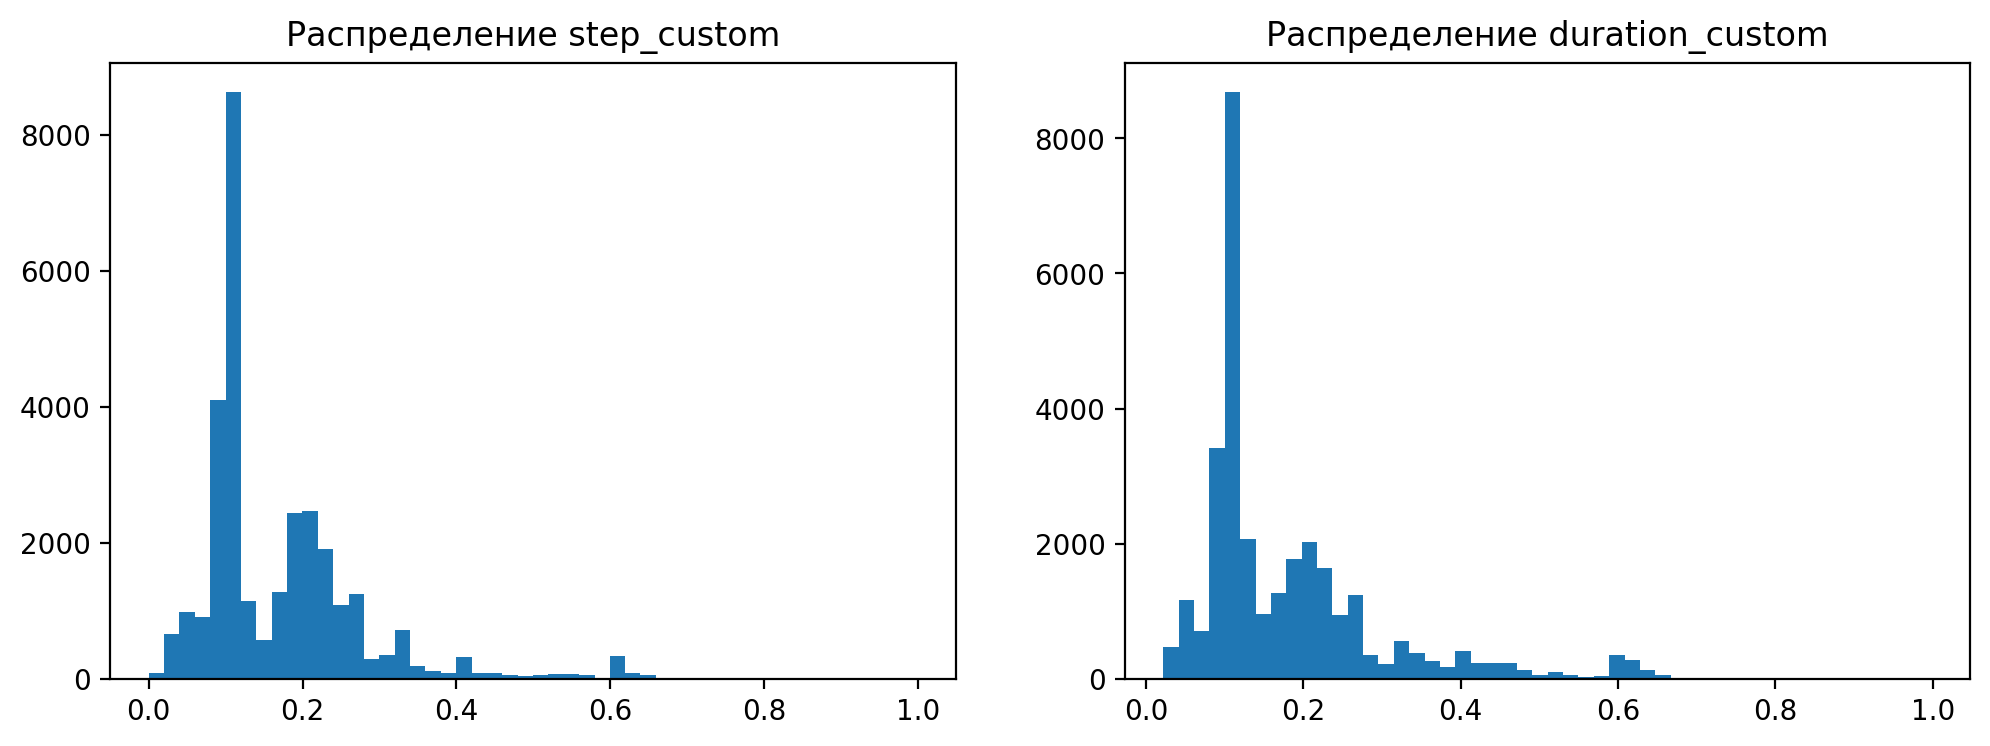

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(Mozart_midi['step_custom'], bins=50)
plt.title("Распределение step_custom")

plt.subplot(1, 2, 2)
plt.hist(Mozart_midi['duration_custom'], bins=50)
plt.title("Распределение duration_custom")
plt.show()

### Нарезка сидов

In [ ]:
# нам не нужны таргеты, по этому берем только первый элемент из функции
seeds = prepare_seq(Mozart_midi, mapping=mapping, return_full=False)

Пример набора pitch, step, duration: [0.81896552 0.10144043 0.1116333 ]
Форма: (29762, 32, 3)


Данные подготовлены для подачи в модель, можно приступать к созданию и обучению самой модели.

#Модель НС

Состоит из одного входа и расходится на 3 выхода для предсказания параметров отдельно. У каждого своя метрика и показатели потерь.

In [ ]:
Inputs = Input(shape=train_features.shape[1:])

# общий слой LSTM
x = LSTM(128, return_sequences=True)(Inputs)
x = LSTM(128)(x)

#голова pitch
pitch_branch = Dense(128, activation='relu')(x)
pitch_branch = Dropout(0.4)(pitch_branch)
pitch_out = Dense(L_symb, activation='softmax', name='pitch')(pitch_branch)

#голова step
step_out = Dense(1, activation='sigmoid', name='step')(x)

#голова duration
duration_out = Dense(1, activation='sigmoid', name='duration')(x)

model = Model(inputs=Inputs,
              outputs=[pitch_out, step_out, duration_out])

model.compile(
    optimizer='adam',
    loss={
        'pitch': 'categorical_crossentropy',
        'step': 'mse',
        'duration': 'mse'
    },
    metrics={
        'pitch': 'accuracy',
        'step': 'mae',
        'duration': 'mae'
    }
)

model.summary()

I0000 00:00:1747569373.486366      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 3)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 32, 128)        │         67,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 128)            │        131,584 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         16,512 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pitch (Dense)             │ (None, 116)            │         14,964 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ step (Dense)              │ (None, 1)              │            129 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ duration (Dense)          │ (None, 1)              │            129 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 230,902 (901.96 KB)

 Trainable params: 230,902 (901.96 KB)

 Non-trainable params: 0 (0.00 B)

##Обучение

In [ ]:
def plot_graph(history=history):
    plt.figure(figsize=(12, 8))

    # Pitch Loss
    plt.subplot(3, 1, 1)
    plt.plot(history.history['pitch_loss'], label='Train')
    plt.title('Pitch Categorical Crossentropy Loss')
    plt.ylabel('Loss')
    plt.legend()

    # Step Loss
    plt.subplot(3, 1, 2)
    plt.plot(history.history['step_loss'], label='Train')
    plt.title('Step MSE Loss')
    plt.ylabel('Loss')
    plt.legend()

    # Duration Loss
    plt.subplot(3, 1, 3)
    plt.plot(history.history['duration_loss'], label='Train')
    plt.title('Duration MSE Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
history = model.fit(x=train_features,
                    y={
                        'pitch': target_ohe,
                        'step': target_step,
                        'duration': target_duration
                        },
                    epochs=300,
                    batch_size=128,
                    )

Epoch 1/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - duration_loss: 0.0085 - duration_mae: 0.0491 - loss: 3.8478 - pitch_accuracy: 0.0773 - pitch_loss: 3.8334 - step_loss: 0.0060 - step_mae: 0.0448
Epoch 2/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - duration_loss: 0.0085 - duration_mae: 0.0496 - loss: 3.7814 - pitch_accuracy: 0.0826 - pitch_loss: 3.7675 - step_loss: 0.0054 - step_mae: 0.0433
Epoch 3/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - duration_loss: 0.0081 - duration_mae: 0.0494 - loss: 3.7209 - pitch_accuracy: 0.0931 - pitch_loss: 3.7074 - step_loss: 0.0053 - step_mae: 0.0430
Epoch 4/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - duration_loss: 0.0081 - duration_mae: 0.0493 - loss: 3.6254 - pitch_accuracy: 0.0980 - pitch_loss: 3.6119 - step_loss: 0.0054 - step_mae: 0.0427
Epoch 5/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - duration_loss: 0.0082 - duration_mae: 0.0485 - loss: 3.5449 - pitch_accuracy: 0.1092 - pitch_loss: 3.5313 - step_loss: 0.0054 - step_mae: 0.

## Графики обучения

Голова pitch c 1 Dense слоем пакет 32

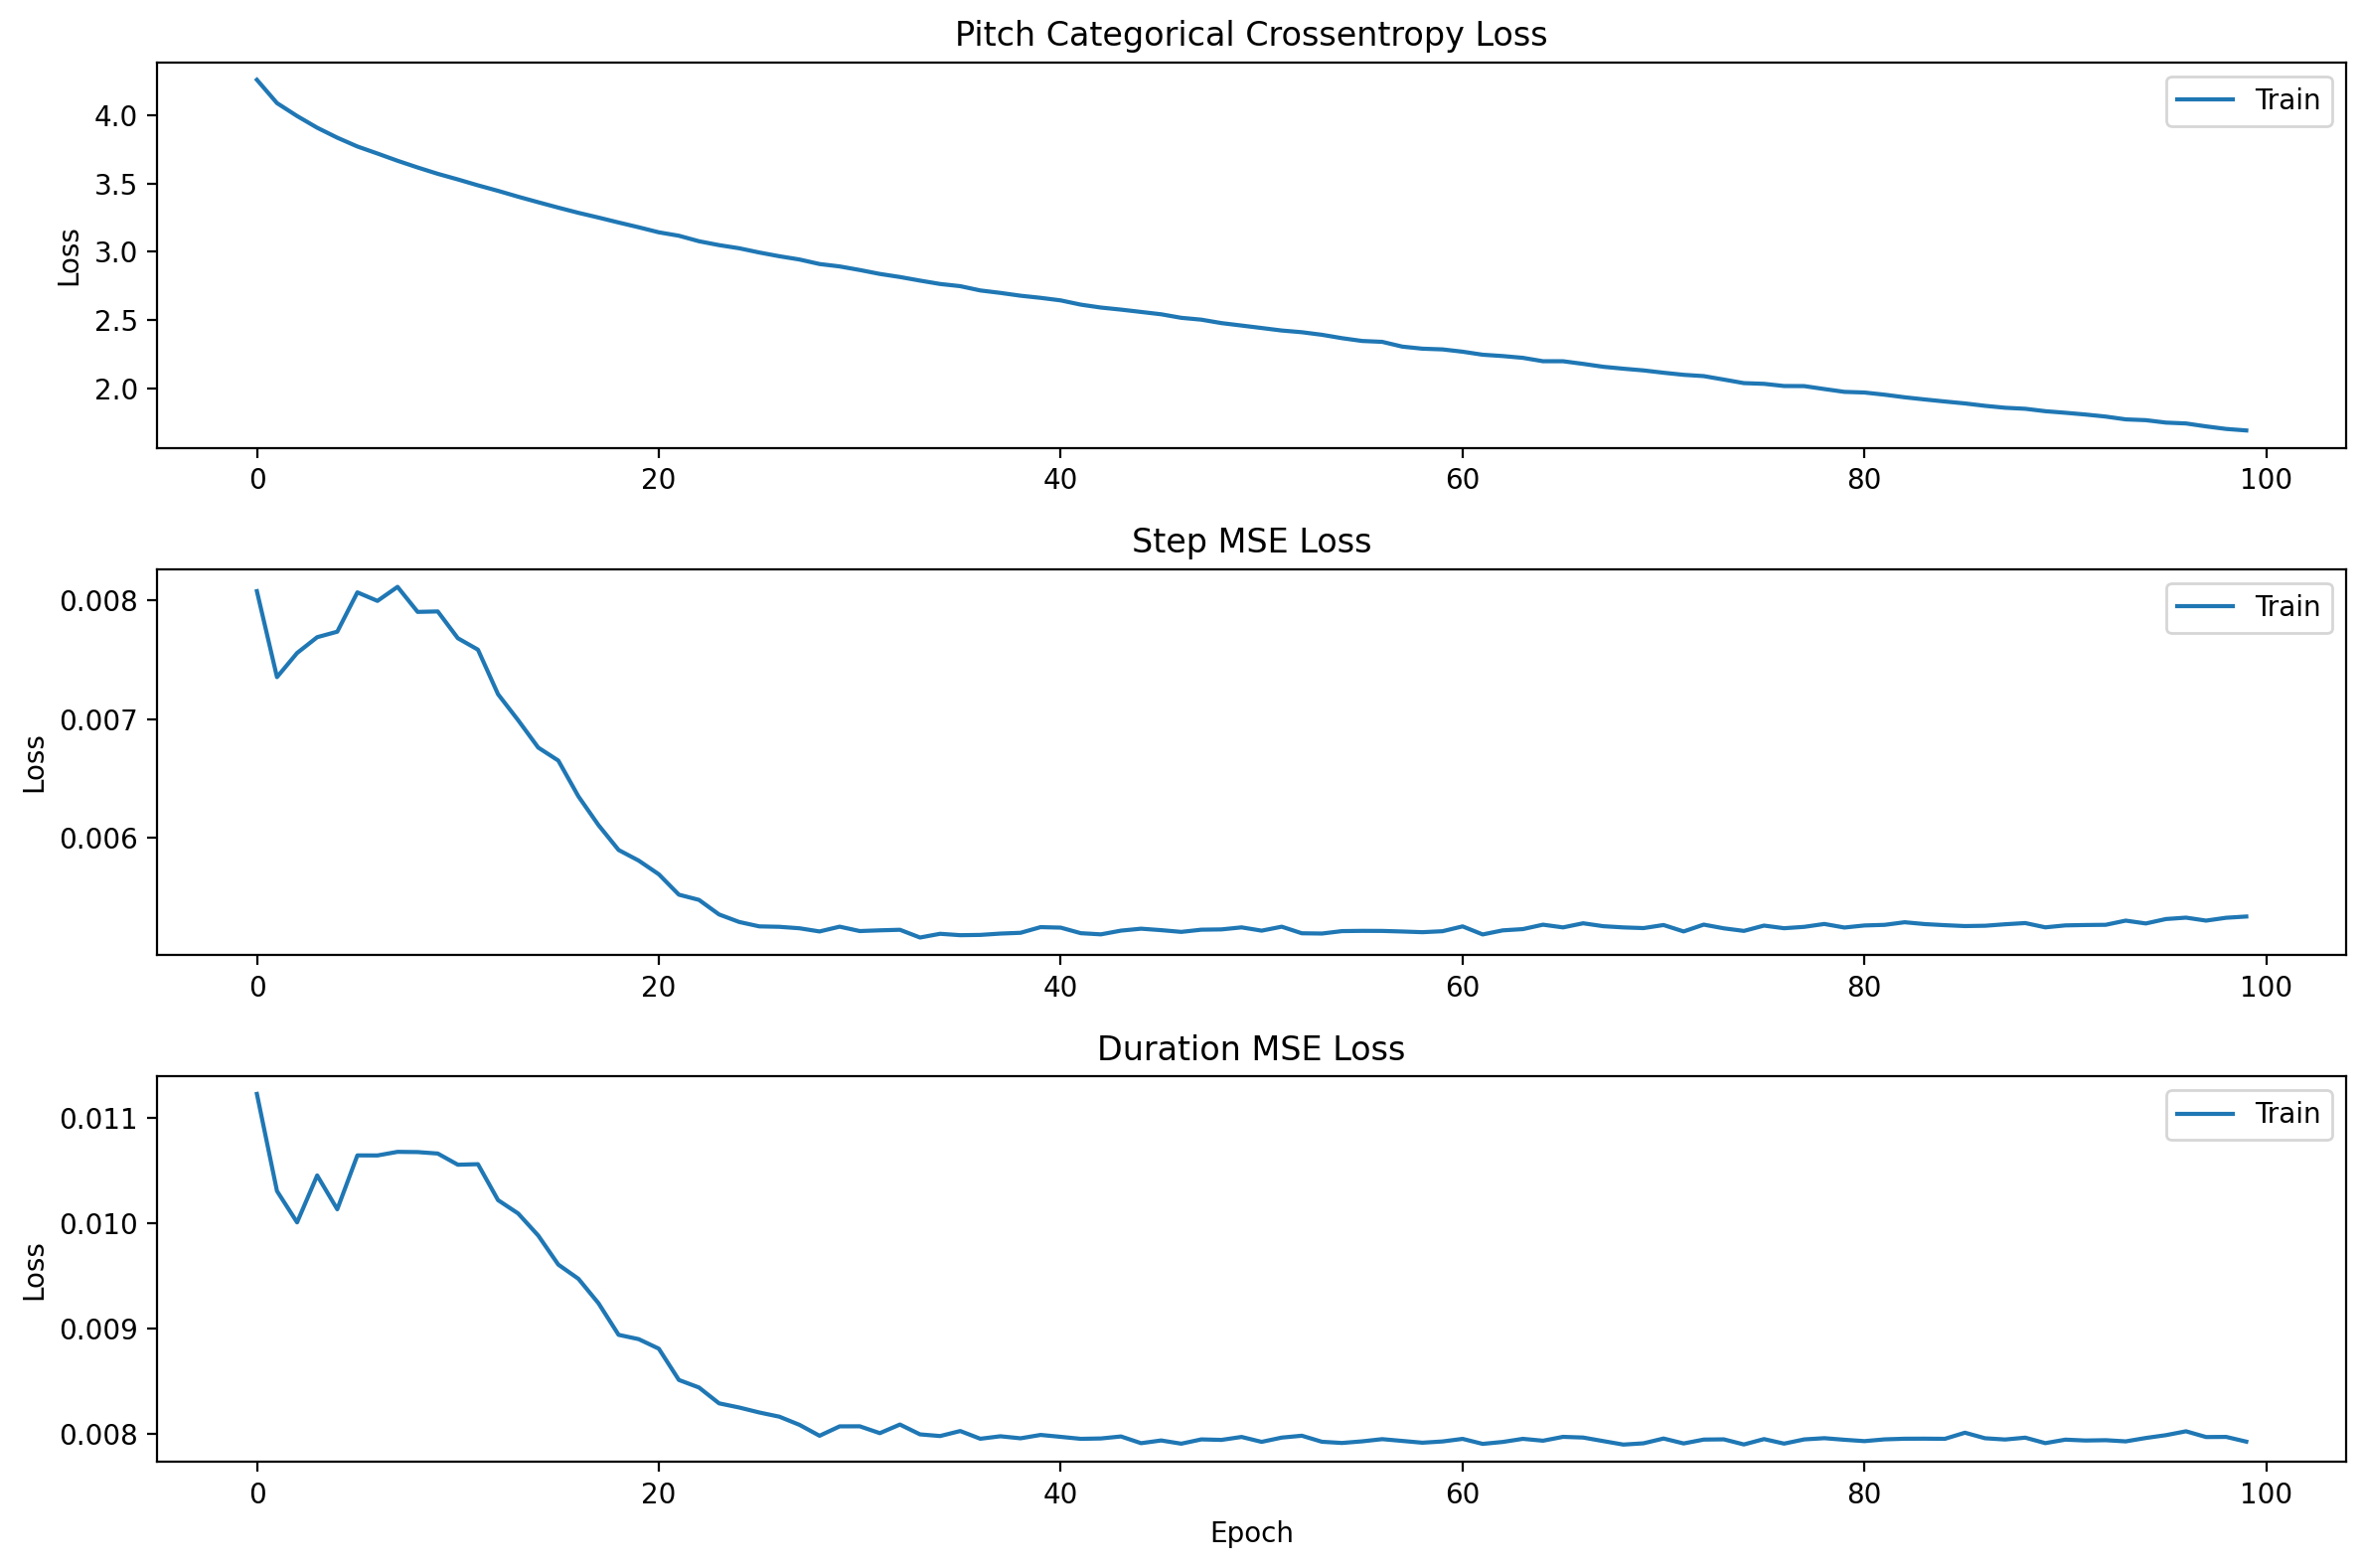

In [ ]:
plt.figure(figsize=(12, 8))

# Pitch Loss
plt.subplot(3, 1, 1)
plt.plot(history.history['pitch_loss'], label='Train')
plt.title('Pitch Categorical Crossentropy Loss')
plt.ylabel('Loss')
plt.legend()

# Step Loss
plt.subplot(3, 1, 2)
plt.plot(history.history['step_loss'], label='Train')
plt.title('Step MSE Loss')
plt.ylabel('Loss')
plt.legend()

# Duration Loss
plt.subplot(3, 1, 3)
plt.plot(history.history['duration_loss'], label='Train')
plt.title('Duration MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Доп слой Dense(128)+drop(0.4) в pitch

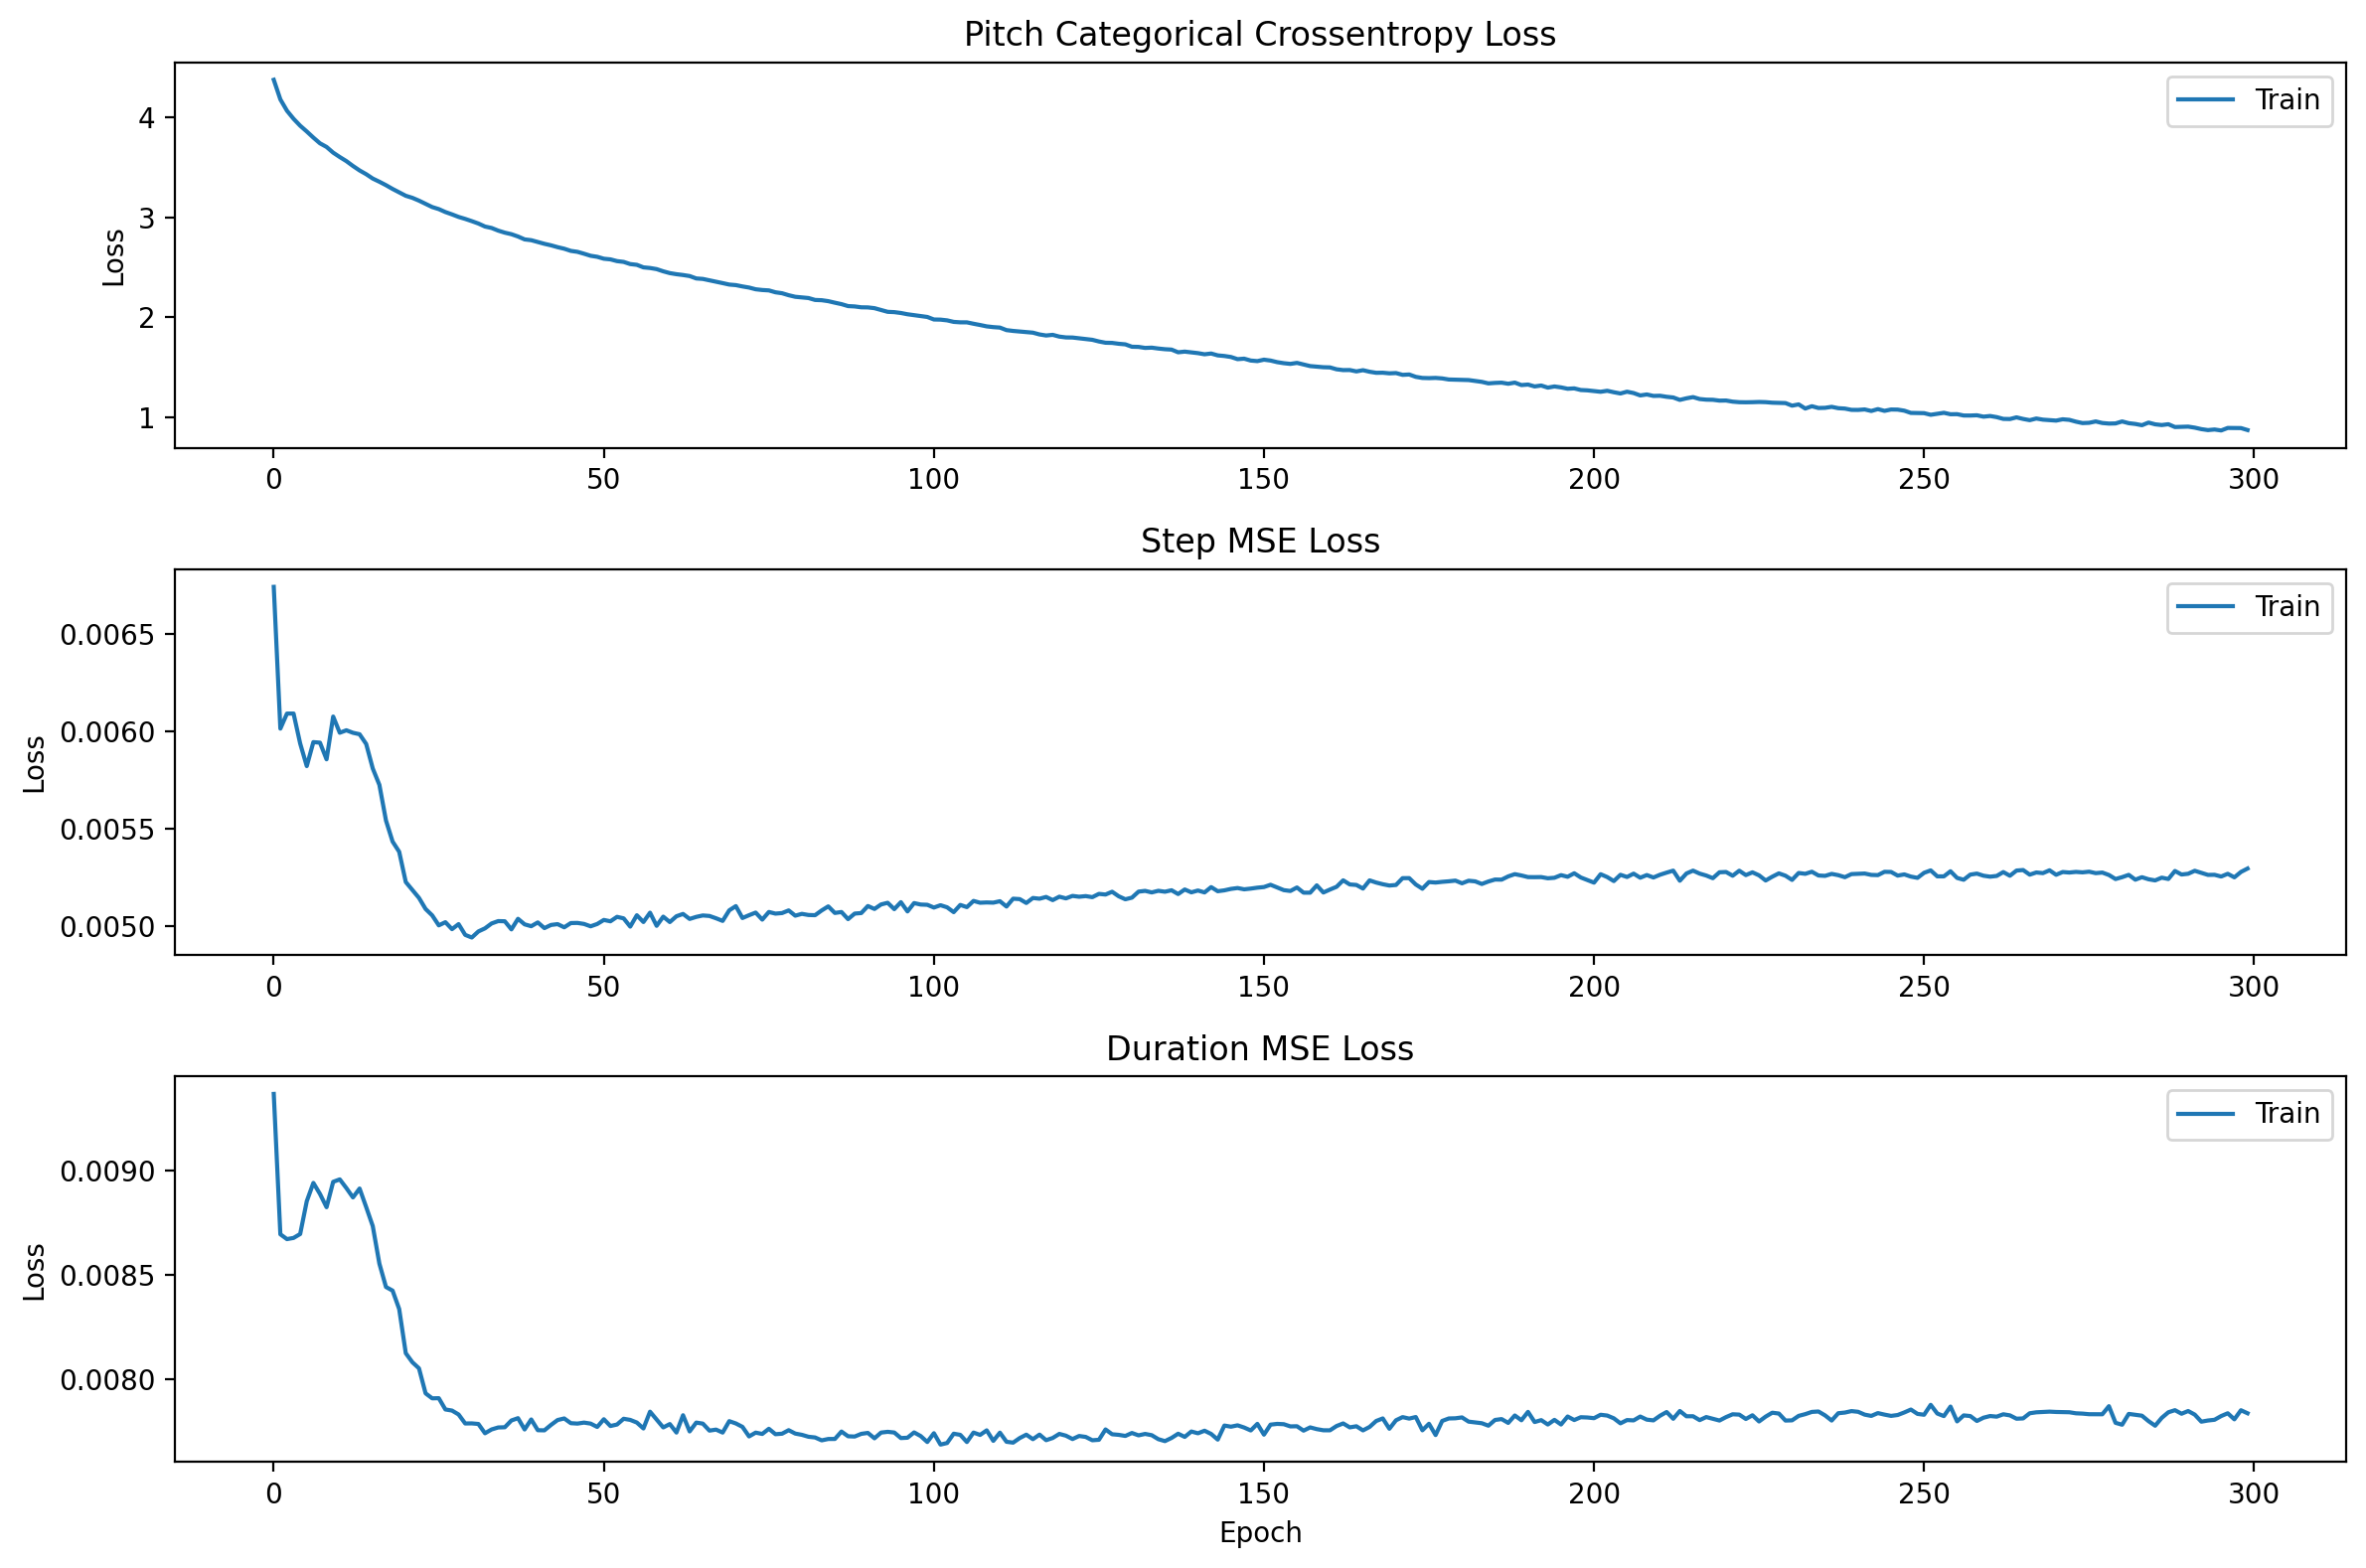

In [ ]:
plot_graph()

Активация Sigmoid в головах step и duration

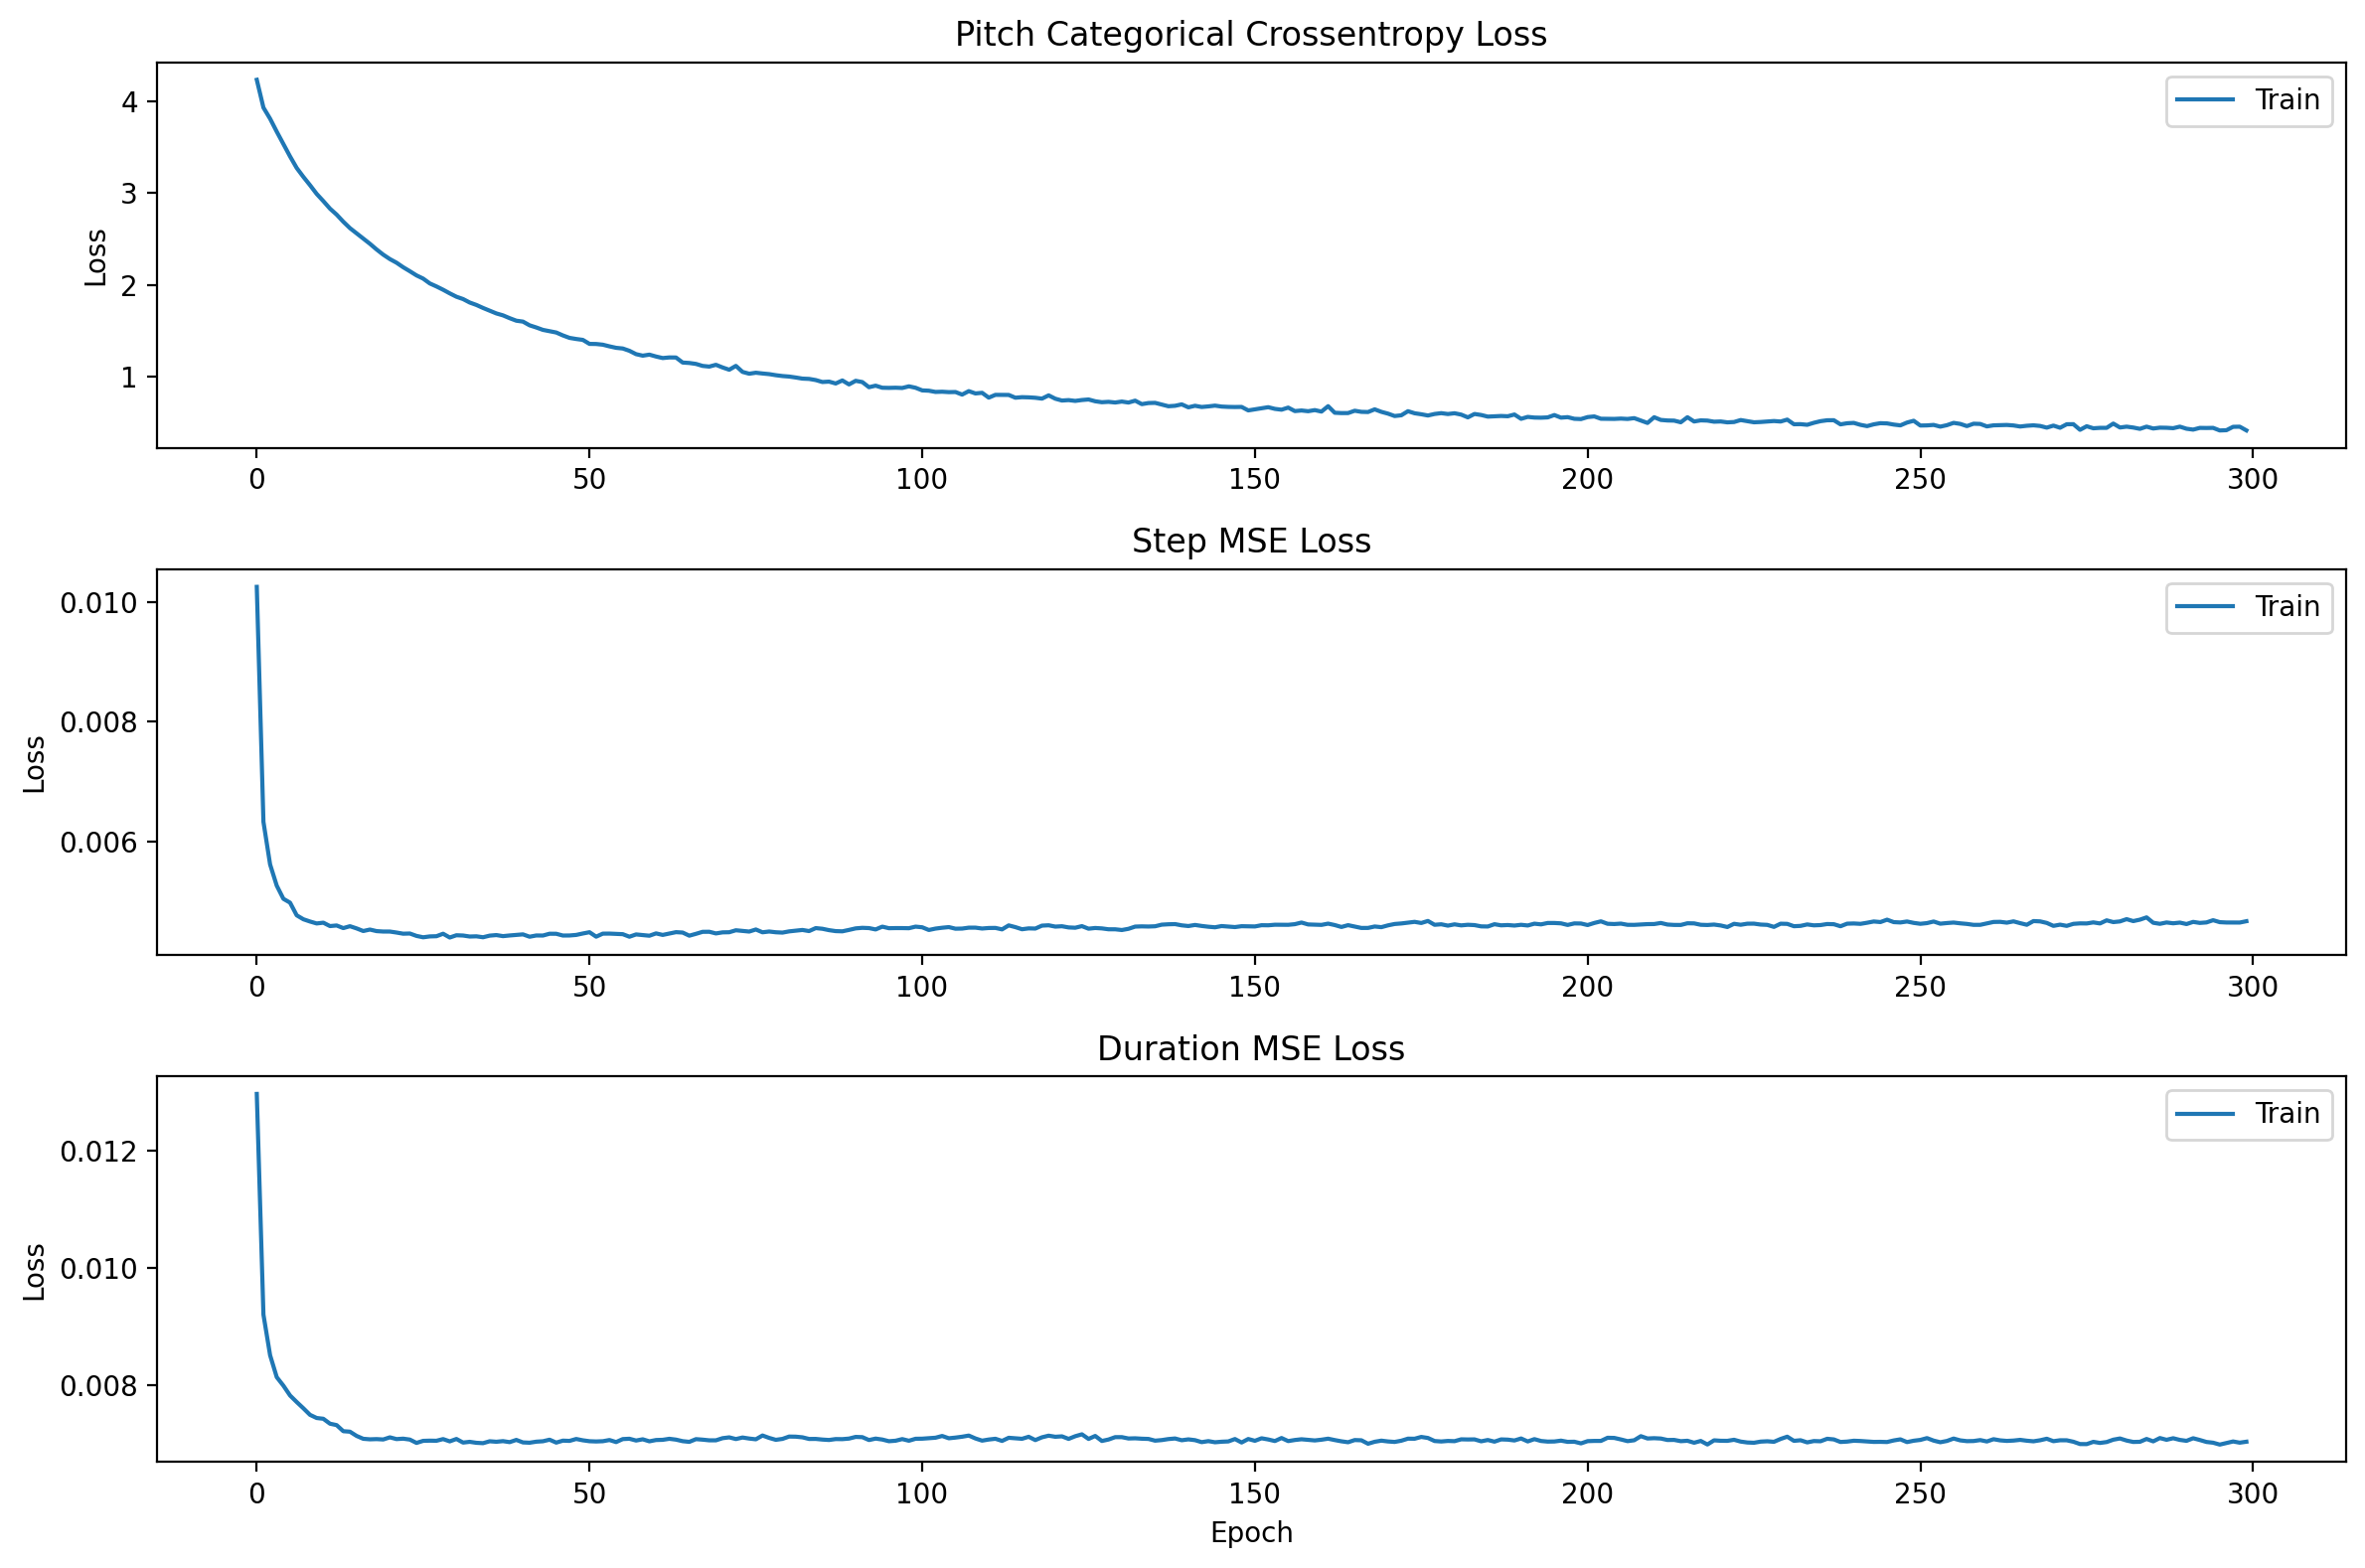

In [ ]:
plot_graph()

Сигмоида показала очень плавный график обучения в сравнении с linear

Пакеты 128

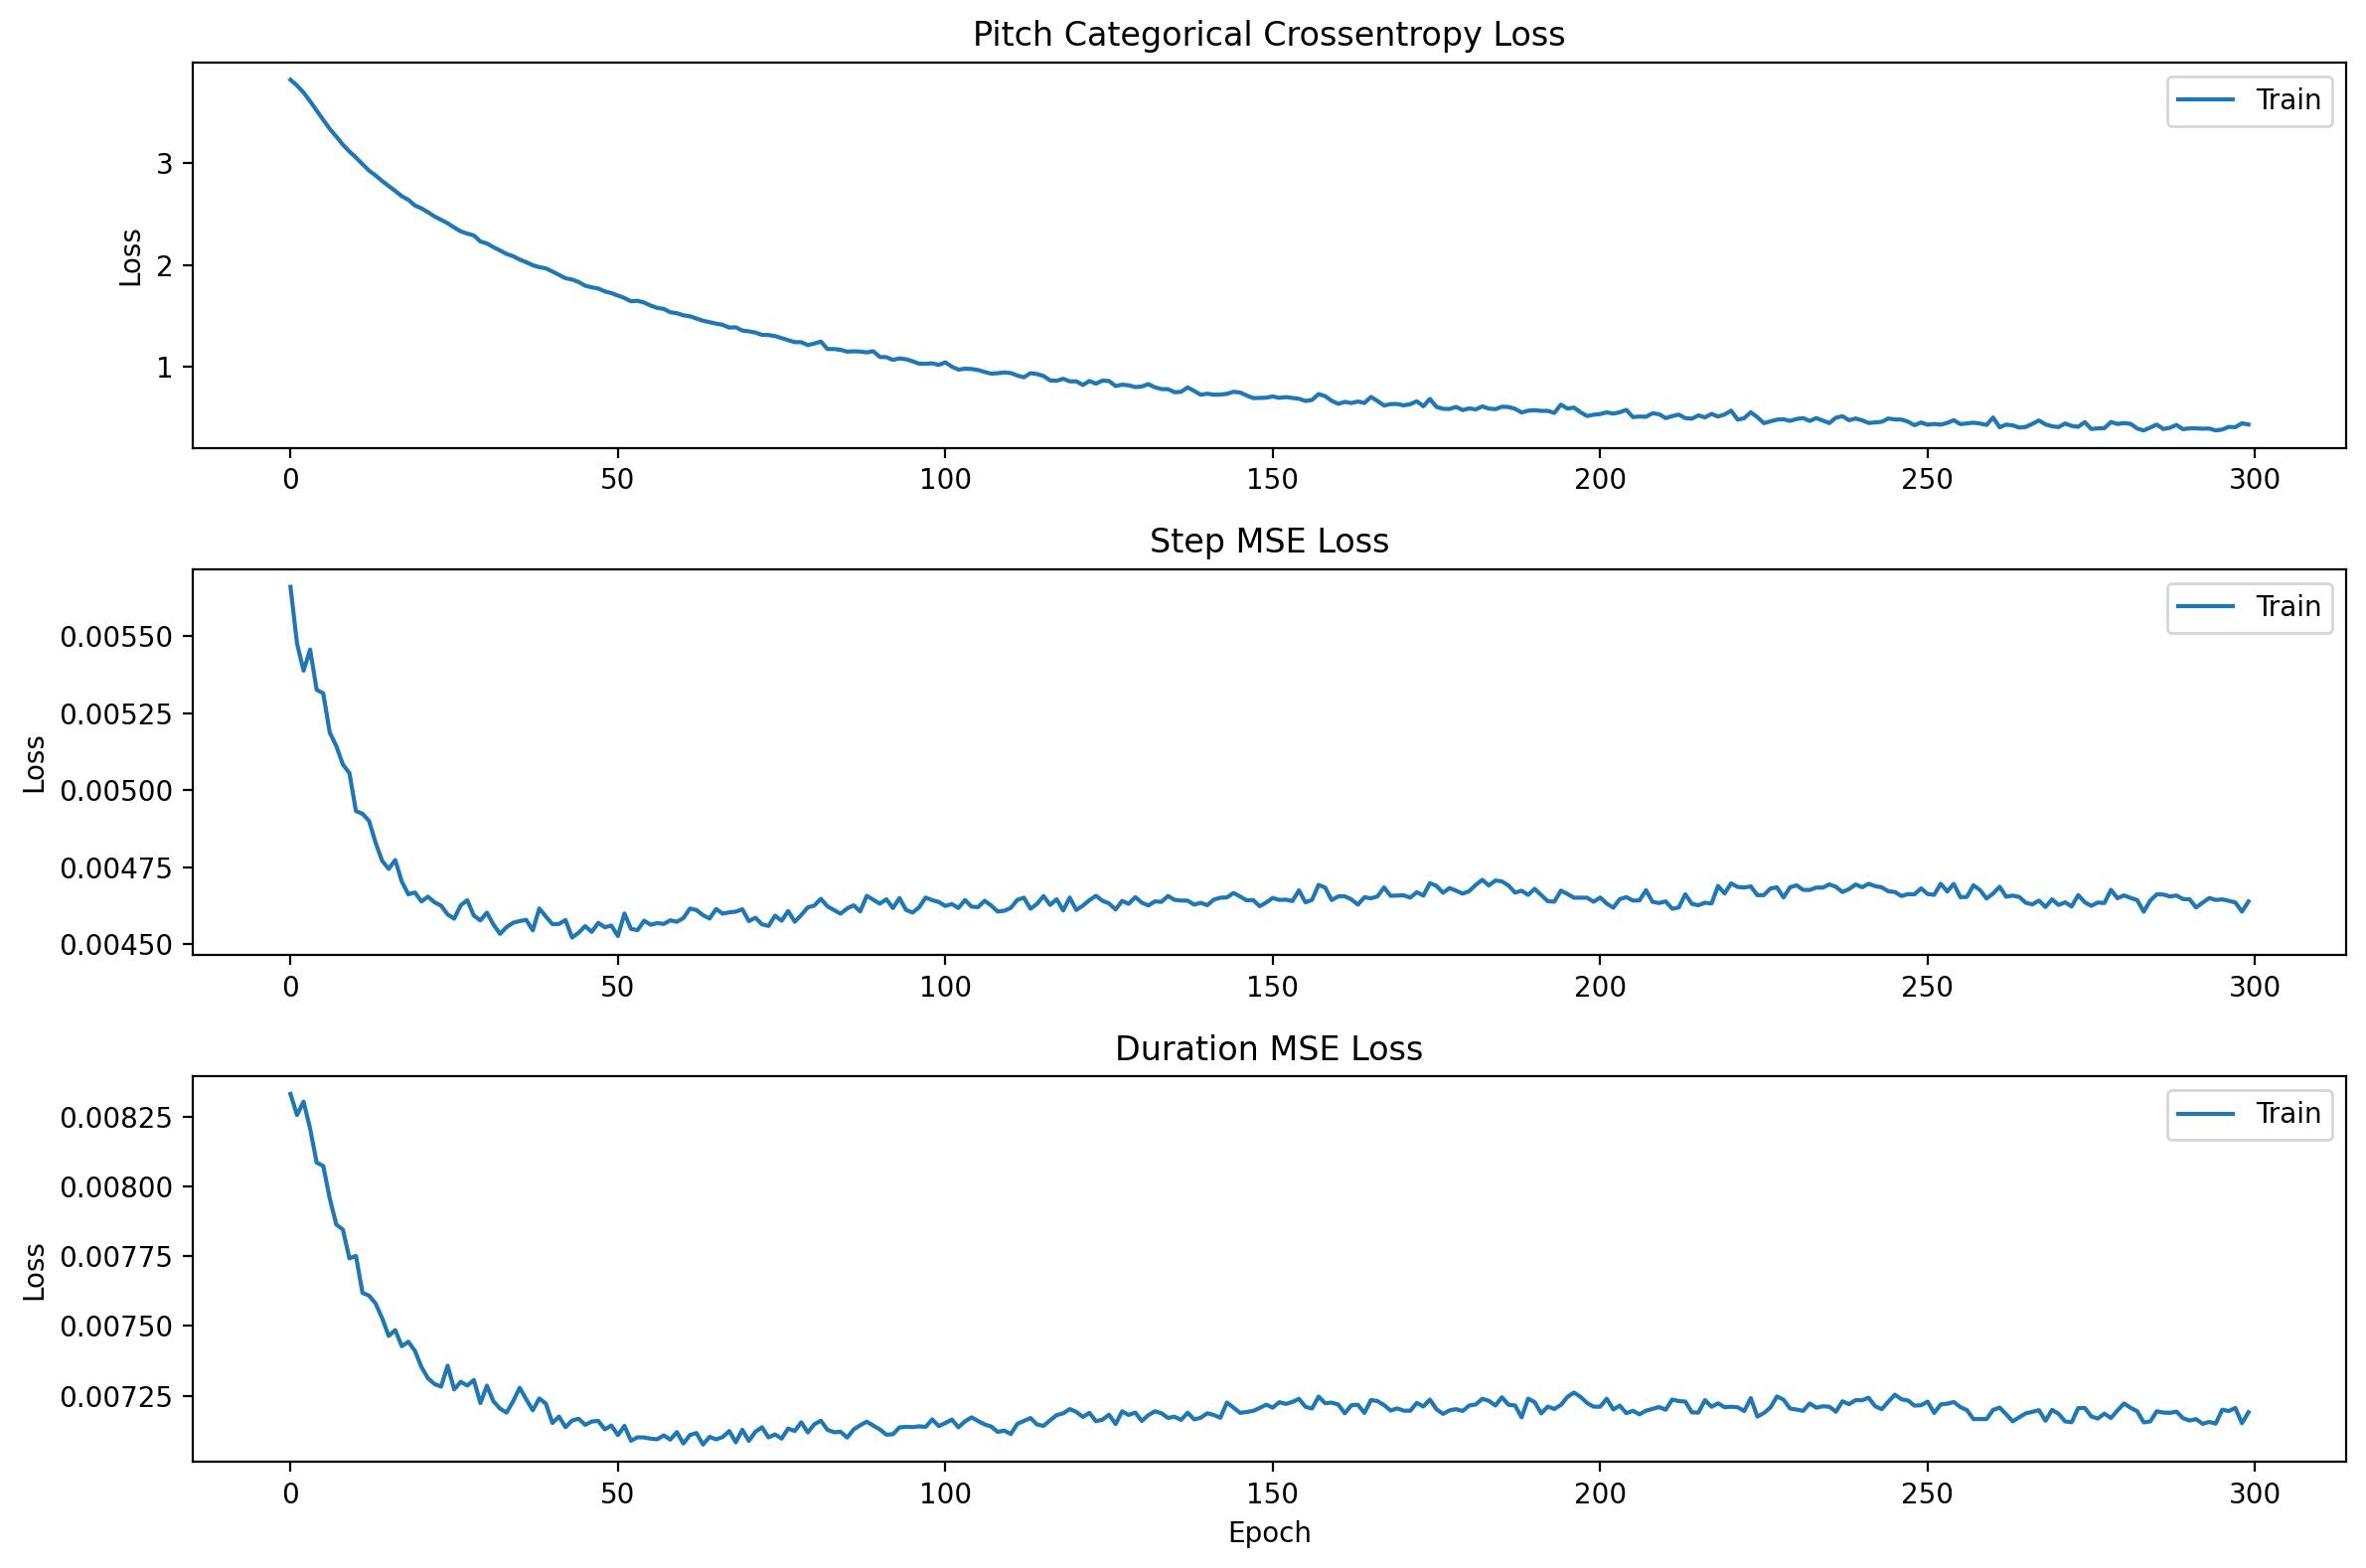

In [ ]:
plot_graph()

На больших пакетах графики стали более резкими

In [ ]:
model.save('model.keras')

In [ ]:
!wget https://storage.yandexcloud.net/quiz.pic/audiomodel.keras

--2025-05-17 20:44:56--  https://storage.yandexcloud.net/quiz.pic/audiomodel.keras
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2823628 (2.7M) [application/x-www-form-urlencoded]
Saving to: ‘audiomodel.keras’

audiomodel.keras    100%[===================>]   2.69M  1.83MB/s    in 1.5s    

2025-05-17 20:44:59 (1.83 MB/s) - ‘audiomodel.keras’ saved [2823628/2823628]



In [ ]:
model = load_model('audiomodel.keras')

# Функция предсказаний и создания музыкальной последовательности

In [ ]:
seed = seeds[np.random.randint(0, len(seeds)-1)]

In [ ]:
seed.shape

(32, 3)

In [ ]:
def apply_temperature(probs, temperature):
    # Применяет температуру к вероятностям
    if temperature <= 0:
        temperature = 1e-10  # Защита от деления на 0

    log_probs = np.log(probs) / temperature
    exp_probs = np.exp(log_probs)
    return exp_probs / np.sum(exp_probs)

def add_notes_to_midi(instrument, pitch_index, start_time, duration, reverse_mapping):
    # Добавляет ноты (одиночные или аккорды) в MIDI-трек
    try:
        # Получаем кортеж нот
        midi_notes = reverse_mapping[pitch_index]

        # Создаем ноты
        for midi_pitch in midi_notes:
            note = pretty_midi.Note(
                velocity = 120,
                pitch=midi_pitch,
                start=start_time,
                end=start_time + duration
            )
            instrument.notes.append(note)

    # в нашем случае размер головы соответствует размеру словаря
    # что означает соответст
    except KeyError:
        print(f"Предупреждение: индекс {pitch_index} не найден в reverse_mapping")
    except ValueError as e:
        print(f"Ошибка создания ноты: {e}")


def music_generator(model, seeds, length=32, seq_len=100, temperature=1.0, step_max_value=step_max_value, duration_max_value=duration_max_value):

    temperature = np.clip(float(temperature), 0.3, 1.7)
    # случайный выбор начальной последовательности
    seed = seeds[np.random.randint(0, len(seeds)-1)].copy()
    seed = seed.reshape(length, 3)

    # Инициализируем объект MIDI
    midi_data = pretty_midi.PrettyMIDI()
    piano = pretty_midi.Instrument(program=0)
    midi_data.instruments.append(piano)

    # Текущее время в секундах
    current_time = 0.0

    for _ in range(seq_len):
        # Подготавливаем входные данные
        inputs = seed.reshape(1, length, 3)

        # Получаем предсказания модели
        pitch_pred, step_pred, dur_pred = model.predict(inputs, verbose=0)

        # Применяем температуру
        pitch_probs = apply_temperature(pitch_pred[0], temperature)
        pitch_idx = np.random.choice(len(pitch_probs), p=pitch_probs)

        # Денормализация
        step = custom_descale(step_pred[0][0], step_max_value)
        duration = custom_descale(dur_pred[0][0], duration_max_value)

        # Добавление нот
        add_notes_to_midi(piano, pitch_idx, current_time, duration, reverse_mapping)

        # Обновление времени и seed
        current_time += step
        new_seed = np.array([
            pitch_idx / float(L_symb),
            step_pred[0][0],
            dur_pred[0][0]
            ])

        # Обновляем seed (сохраняем 3D форму)
        seed = np.vstack([seed[1:], new_seed])

    return midi_data



# Генерация музыки

In [ ]:
# Генерируем MIDI
gen_midi = music_generator(model, seeds, temperature=0.2)

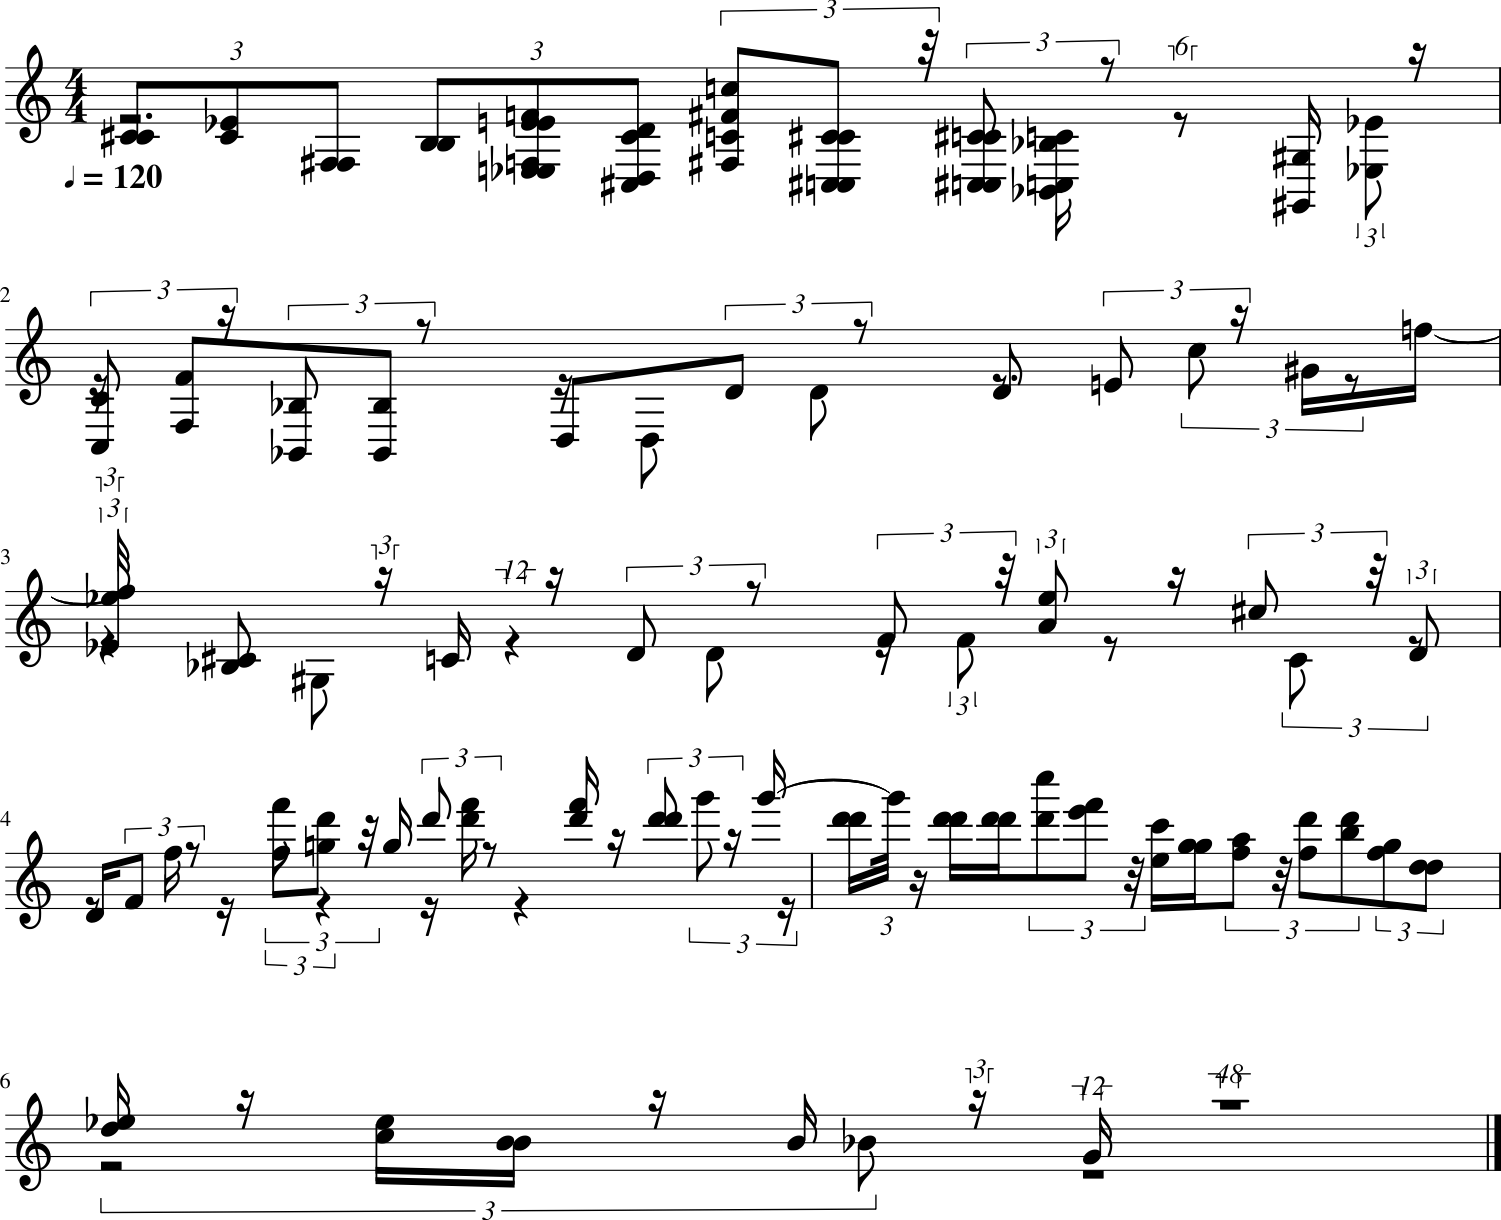

In [ ]:
# Сохраняем во временный файл
gen_midi.write("temp.mid")

# Загружаем в music21 и проигрываем
gen_stream = converter.parse("temp.mid")
gen_stream.show()          # Показать ноты
gen_stream.show('midi')    # Воспроизвести

Забавная генерация получается, хоть и без выстроенной логической муыкальной структуры.

# Описание Температуры


1. **Ключевые понятия простыми словами**
    - **Температура (T)** — это "регулятор случайности". Чем она выше, тем неожиданнее будут результаты модели.

    - **Логиты** — это "сырые оценки" модели для каждого возможного варианта (например, для каждой ноты).

    - **Softmax** — превращает эти оценки в вероятности, чтобы можно было выбрать вариант случайно, но с учётом предпочтений модели.

2. **Как это работает шаг за шагом**
    
    Модель выдаёт оценки

    Например, для нот До, Ре, Ми модель может выдать числа [5, 2, 1] — это логиты.

    **Делим оценки на температуру**

        - Если T=1, оценки остаются [5, 2, 1]
        - Если T=0.5, они становятся [10, 4, 2] (различия усиливаются)
        - Если T=2, получаем [2.5, 1, 0.5] (различия сглаживаются)
    
    **Превращаем в вероятности**
    
    С помощью softmax преобразуем эти числа в вероятности, где сумма всех равна 100%.

    **Выбираем результат случайно**

    Например, если получились вероятности [85%, 12%, 3%], то чаще всего будем выбирать первый вариант.

3. **Что меняет температура**

    **Низкая температура (0.1-0.5):**

    Усиливает самые вероятные варианты. Модель становится "увереннее" и повторяет привычные паттерны.

    **Обычная температура (1.0):**

    Оставляет как есть. Баланс между предсказуемостью и разнообразием.

    **Высокая температура (1.5-2.0+):**

    Сглаживает различия. Модель чаще выбирает неочевидные варианты, создаёт более неожиданные сочетания.

4. **Пример из музыки**
Допустим, модель выбирает следующую ноту:

    При T=0.3: почти всегда выбирает самый вероятный вариант → монотонная, но гармоничная мелодия

    При T=1.0: иногда делает интересные отклонения → естественное звучание

    При T=1.8: часто выбирает неожиданные ноты → экспериментальная музыка

5. **Важные нюансы**

    Всегда должна быть больше нуля (иначе деление на ноль)

    Очень высокие значения (>3) делают выбор практически случайным

    Для численной стабильности в расчётах используют специальные приёмы

**Итог:** Температура — это как "регулятор креативности". Поворачивая его, мы можем получать либо строгие предсказуемые результаты, либо смелые неожиданные решения. Оптимальное значение зависит от задачи: для классической музыки — пониже, для джаза — повыше.